In [9]:
import datetime
import pandas as pd
import newspaper
from newspaper import Article
from time import mktime
from datetime import datetime, timedelta
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize.regexp import WhitespaceTokenizer
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob
import pymongo
import json

[nltk_data] Downloading package punkt to /Users/hsaul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hsaul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [713]:
from eventregistry import *
er = EventRegistry(apiKey = '33bbd245-d081-4083-aea8-aae044547b59' )
q = QueryArticles(
    dateStart = datetime.date(2020, 1, 1), dateEnd = datetime.date(2020, 4, 20),
    conceptUri = er.getConceptUri("Coronavirus"),
    sourceUri = er.getNewsSourceUri("Breitbart"))

# return details about the articles, including the concepts, categories, location and image
q.setRequestedResult(RequestArticlesInfo(count = 200,
    sortBy = "socialScore",
    returnInfo = ReturnInfo(
        articleInfo = ArticleInfoFlags(socialScore= True, duplicateList = True, concepts = True, categories = True, location = True, image = True))))
# execute the query
March_weektwo_WSJ = er.execQuery(q)

using user provided API key for making requests
Event Registry host: http://eventregistry.org
Text analytics host: http://analytics.eventregistry.org


In [714]:
March_weektwo_WSJ

{'articles': {'results': [{'uri': '6003539531',
    'lang': 'eng',
    'isDuplicate': False,
    'date': '2020-03-22',
    'time': '17:28:00',
    'dateTime': '2020-03-22T17:28:00Z',
    'dateTimePub': '2020-03-22T16:48:00Z',
    'dataType': 'news',
    'sim': 0.7686274647712708,
    'url': 'https://www.breitbart.com/health/2020/03/22/florida-college-students-test-positive-coronavirus-after-spring-break-trip/',
    'title': 'College Students Test Positive for Coronavirus After Spring Break Trip',
    'body': 'Five college students from the University of Tampa tested positive for the coronavirus after coming back from a spring break trip, the school announced.\n\nWFLA reported that the students were traveling together with other University of Tampa students before testing positive. The school did not state where the students went during their break or whether they lived in the dorms or off-campus.\n\nThe students are currently recovering from the disease and are in self-isolation, WFTS 

In [10]:
##Iterate through JSON files in github and load into notebook

newspapers = ['Breitbart','Business_Insider','Fox News','Financial Times','MarketWatch','NYTimes','Reuters','The Guardian','WSJ']
times = ['1_1','1_2','1_3','1_4','2_1','2_2','2_3','2_4','3_1','3_2','3_3','3_4','4_1','4_2']
df = pd.DataFrame(columns = ["newspaper","time","keywords"])

for paper in newspapers: 
    for time in times:
        print(paper,time)
        with open(paper+'/'+time+'.json') as json_file:
            total_data = json.load(json_file)
            
            ##Make an empty list for every article, derive the keywords and append to list
            l=[]
            for data in total_data['articles']['results']:
                art = Article(url=data['url'])
                try:
                    art = Article(url=data['url'])
                    art.download()
                    art.parse()
                    art.nlp()
                    l.append(art.keywords)
                    
                except:
                    continue
                    
           #updated empty list creates flat keywords without '' 
            list1=[]
            list1 = [item for sublist in l for item in sublist]
            
            #Append data to dataframe    
            df = df.append({'newspaper': paper, 'time': time, 'keywords': list1}, ignore_index=True)
            
            
            
        

Breitbart 1_1
Breitbart 1_2
Breitbart 1_3
Breitbart 1_4
Breitbart 2_1
Breitbart 2_2
Breitbart 2_3
Breitbart 2_4
Breitbart 3_1
Breitbart 3_2
Breitbart 3_3
Breitbart 3_4
Breitbart 4_1
Breitbart 4_2
Business_Insider 1_1
Business_Insider 1_2
Business_Insider 1_3
Business_Insider 1_4
Business_Insider 2_1
Business_Insider 2_2
Business_Insider 2_3
Business_Insider 2_4
Business_Insider 3_1
Business_Insider 3_2
Business_Insider 3_3
Business_Insider 3_4
Business_Insider 4_1
Business_Insider 4_2
Fox News 1_1
Fox News 1_2
Fox News 1_3
Fox News 1_4
Fox News 2_1
Fox News 2_2
Fox News 2_3
Fox News 2_4
Fox News 3_1
Fox News 3_2
Fox News 3_3
Fox News 3_4
Fox News 4_1
Fox News 4_2
Financial Times 1_1
Financial Times 1_2
Financial Times 1_3
Financial Times 1_4
Financial Times 2_1
Financial Times 2_2
Financial Times 2_3
Financial Times 2_4
Financial Times 3_1
Financial Times 3_2
Financial Times 3_3
Financial Times 3_4
Financial Times 4_1
Financial Times 4_2
MarketWatch 1_1
MarketWatch 1_2
MarketWatch 1_3


Building prefix dict from /opt/anaconda3/lib/python3.7/site-packages/jieba/dict.txt ...
Loading model from cache /var/folders/9x/5lmhqld910d93ww9yzfx4l6c0000gn/T/jieba.cache
Loading model cost 0.8805420398712158 seconds.
Prefix dict has been built succesfully.


WSJ 1_4
WSJ 2_1
WSJ 2_2
WSJ 2_3
WSJ 2_4
WSJ 3_1
WSJ 3_2
WSJ 3_3
WSJ 3_4
WSJ 4_1
WSJ 4_2


In [13]:
df.to_json(r'wordcloud_data.json')

In [698]:
with open('keywords_json.json') as json_file:
            word_data = json.load(json_file)
        

In [775]:
df = pd.DataFrame(word_data)
df

newspaper     date                                           keywords
0    Breitbart   1/6/20                                                 []
1    Breitbart  1/13/20                                                 []
2    Breitbart  1/20/20  ['international', 'chinese', 'patients', 'coro...
3    Breitbart  1/27/20  ['trolls', 'coronavirus', 'force', 'black', 't...
4    Breitbart   2/3/20  ['party', 'chinese', 'li', 'case', 'botched', ...
..         ...      ...                                                ...
121        WSJ   3/9/20  ['bid', 'wall', 'street', 'stimulus', 'sums', ...
122        WSJ  3/16/20  ['department', 'claims', 'jobless', 'administr...
123        WSJ  3/23/30  ['true', 'coronavirus', 'orders', 'deadly', 's...
124        WSJ  3/30/20  ['store', 'say', 'experts', 'safety', 'virus',...
125        WSJ   4/6/20  ['tanker', 'closings', 'dump', 'destroy', 'tur...

[126 rows x 3 columns]

In [778]:
df.to_txt(r'worddata.csv')

AttributeError: 'DataFrame' object has no attribute 'to_txt'

In [5]:
"['trolls', 'coronavirus', 'force', 'black', 'troll', 'president', 'sad', 'task', 'white', 'ebola', 'trump', 'nolte', 'cnn', 'piece', 'trumps', 'viral', 'concerns', 'coronavirus', 'fears', 'drop', 'travelers', 'rising', 'virus', 'infected', 'spread', 'globe', 'stocks', 'shares', 'yields', 'fell', 'wuhan', 'chinese', 'public', 'told', 'admits', 'health', 'left', 'virus', 'lockdown', 'million', 'china', 'officials', 'mayor', 'zhou', 'outbreak', 'wuhan', 'party', 'actively', 'cases', 'coronavirus', 'patients', 'testing', 'reports', 'china', 'health', 'communist', 'virus', 'counts', 'times', 'patient', 'hospitals', 'deflating', 'wuhan', 'aid', 'coronavirus', 'public', 'offers', 'cdc', 'experts', 'send', 'china', 'health', 'azar', 'world', 'officials', 'willing', 'virus', 'accepted', 'travel', 'fight', 'hitpiece', 'following', 'buzzfeed', 'permanently', 'scientist', 'start', 'zero', 'twitter', 'blacklists', 'platform', 'hedge', 'virology', 'institute', 'wuhan', 'tells', 'chinese', 'coronavirus', 'uk', 'country', 'foreign', 'flights', 'china', 'weeks', 'travel', 'brits', 'citizens', 'british', 'wuhan', 'coronavirus', 'district', 'ban', 'swing', 'china', 'protect', 'travel', 'mowers', 'gop', 'trump', 'challengers', 'americans', 'congressional', 'information', 'chinese', 'system', 'saphier', 'dr', 'nicole', 'theyre', 'forthcoming', 'shambles', 'sars', 'china', 'healthcare', 'outbreak', 'coronavirus', 'positive', 'german', 'man', 'china', 'transmission', 'human', 'europe', 'authorities', 'confirmed', 'virus', 'known', 'munich', 'zapf', 'workplace', 'company', 'national', 'overseas', 'coronavirus', 'pandemic', 'plan', 'virologist', 'human', 'vulnerable', 'vaccines', 'vaccine', 'states', 'hatfill', 'local', 'production', 'makes', 'chinese', 'coronavirus', 'yang', 'victims', 'number', 'china', 'virus', 'world', 'cremating', 'secretly', 'media', 'hubei', 'reported', 'accused', 'wuhan', 'chinese', 'coronavirus', 'quarantine', 'paris', 'france', 'planned', 'china', 'virus', 'minister', 'thousands', 'stuck', 'citizens', 'flies', 'buzyn', 'wuhan', 'passengers', 'pilots', 'texas', 'union', 'flights', 'sues', 'china', 'uschina', 'lawsuit', 'airlines', 'order', 'halt', 'american', 'department', 'state', 'declaration', 'cases', 'issues', 'health', 'china', 'virus', 'travel', 'advisory', 'spread', 'countries', 'state', 'coronavirus', 'case', 'ban', 'health', 'china', 'virus', 'area', 'bay', 'confirmed', 'travel', 'trump', 'working', 'taken', 'seventh', 'low', 'shuts', 'ban', 'coronavirus', 'mainland', 'country', 'arriving', 'china', 'travel', 'coronavirushit', 'australian', 'australia', 'minister', 'spread', 'morrison', 'wuhan', 'aid', 'risk', 'coronavirus', 'taiwan', 'battle', 'chinas', 'wuhan', 'status', 'china', 'virus', 'world', 'travel', 'spread', 'prepares', 'taiwanese', 'little', 'confident', 'system', 'state', 'coronavirus', 'concerned', 'health', 'china', 'contain', 'healthcare', 'travel', 'spread', 'survey', 'outbreak', 'americans', 'chinese', 'coronavirus', 'ban', 'targeted', 'administration', 'china', 'virus', 'urge', 'calls', 'travel', 'wrote', 'cotton', 'wuhan', 'theyre', 'saphier', 'dr', 'nicole', 'coronavirus', 'bring', 'right', 'china', 'thing', 'travel', 'stop', 'wuhan', 'coronavirus', 'president', 'donald', 'watch', 'china', 'disease', 'trump', 'states', 'strongly', 'xi', 'wrote', 'offered', 'united', 'deaths', 'viral', 'cases', 'coronavirus', 'city', 'public', 'hit', 'fires', 'official', '171', 'china', 'virus', 'officials', 'outbreak', 'local', 'media', 'wuhan', 'gratitude', 'chinese', 'international', 'coronavirus', 'response', 'owes', 'health', 'china', 'world', 'continued', 'tedros', 'spread', 'outbreak', 'countries', 'extraordinary', 'cases', 'coronavirus', 'pandemic', 'possible', 'doubt', 'readiness', 'cdc', 'health', 'virus', 'physicians', 'situation', 'orient', 'reported', 'potential', 'wuhan']"

In [715]:
BB_string=['trolls', 'coronavirus', 'force', 'black', 'troll', 'president', 'sad', 'task', 'white', 'ebola', 'trump', 'nolte', 'cnn', 'piece', 'trumps', 'viral', 'concerns', 'coronavirus', 'fears', 'drop', 'travelers', 'rising', 'virus', 'infected', 'spread', 'globe', 'stocks', 'shares', 'yields', 'fell', 'wuhan', 'chinese', 'public', 'told', 'admits', 'health', 'left', 'virus', 'lockdown', 'million', 'china', 'officials', 'mayor', 'zhou', 'outbreak', 'wuhan', 'party', 'actively', 'cases', 'coronavirus', 'patients', 'testing', 'reports', 'china', 'health', 'communist', 'virus', 'counts', 'times', 'patient', 'hospitals', 'deflating', 'wuhan', 'aid', 'coronavirus', 'public', 'offers', 'cdc', 'experts', 'send', 'china', 'health', 'azar', 'world', 'officials', 'willing', 'virus', 'accepted', 'travel', 'fight', 'hitpiece', 'following', 'buzzfeed', 'permanently', 'scientist', 'start', 'zero', 'twitter', 'blacklists', 'platform', 'hedge', 'virology', 'institute', 'wuhan', 'tells', 'chinese', 'coronavirus', 'uk', 'country', 'foreign', 'flights', 'china', 'weeks', 'travel', 'brits', 'citizens', 'british', 'wuhan', 'coronavirus', 'district', 'ban', 'swing', 'china', 'protect', 'travel', 'mowers', 'gop', 'trump', 'challengers', 'americans', 'congressional', 'information', 'chinese', 'system', 'saphier', 'dr', 'nicole', 'theyre', 'forthcoming', 'shambles', 'sars', 'china', 'healthcare', 'outbreak', 'coronavirus', 'positive', 'german', 'man', 'china', 'transmission', 'human', 'europe', 'authorities', 'confirmed', 'virus', 'known', 'munich', 'zapf', 'workplace', 'company', 'national', 'overseas', 'coronavirus', 'pandemic', 'plan', 'virologist', 'human', 'vulnerable', 'vaccines', 'vaccine', 'states', 'hatfill', 'local', 'production', 'makes', 'chinese', 'coronavirus', 'yang', 'victims', 'number', 'china', 'virus', 'world', 'cremating', 'secretly', 'media', 'hubei', 'reported', 'accused', 'wuhan', 'chinese', 'coronavirus', 'quarantine', 'paris', 'france', 'planned', 'china', 'virus', 'minister', 'thousands', 'stuck', 'citizens', 'flies', 'buzyn', 'wuhan', 'passengers', 'pilots', 'texas', 'union', 'flights', 'sues', 'china', 'uschina', 'lawsuit', 'airlines', 'order', 'halt', 'american', 'department', 'state', 'declaration', 'cases', 'issues', 'health', 'china', 'virus', 'travel', 'advisory', 'spread', 'countries', 'state', 'coronavirus', 'case', 'ban', 'health', 'china', 'virus', 'area', 'bay', 'confirmed', 'travel', 'trump', 'working', 'taken', 'seventh', 'low', 'shuts', 'ban', 'coronavirus', 'mainland', 'country', 'arriving', 'china', 'travel', 'coronavirushit', 'australian', 'australia', 'minister', 'spread', 'morrison', 'wuhan', 'aid', 'risk', 'coronavirus', 'taiwan', 'battle', 'chinas', 'wuhan', 'status', 'china', 'virus', 'world', 'travel', 'spread', 'prepares', 'taiwanese', 'little', 'confident', 'system', 'state', 'coronavirus', 'concerned', 'health', 'china', 'contain', 'healthcare', 'travel', 'spread', 'survey', 'outbreak', 'americans', 'chinese', 'coronavirus', 'ban', 'targeted', 'administration', 'china', 'virus', 'urge', 'calls', 'travel', 'wrote', 'cotton', 'wuhan', 'theyre', 'saphier', 'dr', 'nicole', 'coronavirus', 'bring', 'right', 'china', 'thing', 'travel', 'stop', 'wuhan', 'coronavirus', 'president', 'donald', 'watch', 'china', 'disease', 'trump', 'states', 'strongly', 'xi', 'wrote', 'offered', 'united', 'deaths', 'viral', 'cases', 'coronavirus', 'city', 'public', 'hit', 'fires', 'official', '171', 'china', 'virus', 'officials', 'outbreak', 'local', 'media', 'wuhan', 'gratitude', 'chinese', 'international', 'coronavirus', 'response', 'owes', 'health', 'china', 'world', 'continued', 'tedros', 'spread', 'outbreak', 'countries', 'extraordinary', 'cases', 'coronavirus', 'pandemic', 'possible', 'doubt', 'readiness', 'cdc', 'health', 'virus', 'physicians', 'situation', 'orient', 'reported', 'potential', 'wuhan','party', 'chinese', 'li', 'case', 'botched', 'wuhan', 'admits', 'public', 'battle', 'social', 'post', 'china', 'death', 'whistleblower', 'media', 'doctor', 'reported', 'chinese', 'li', 'wuhan', 'coronavirus', 'lis', 'reports', 'death', 'virus', 'china', 'hospital', 'whistleblower', 'deletes', 'media', 'doctor', 'diagnosis', 'coronavirus', 'public', 'man', 'health', 'virus', 'massachusetts', 'temporarily', 'officials', 'boston', 'visited', '8th', 'united', 'chaos', 'chinese', 'party', 'communism', 'coronavirus', 'outbreak', 'health', 'virus', 'communist', 'proves', 'times', 'epidemic', 'good', 'media', 'wuhan', 'party', 'chinese', 'coronavirus', 'purge', 'money', 'virus', 'communist', 'begins', 'care', 'officials', 'outbreak', 'yan', 'wuhan', 'coronavirus', 'taiwan', 'response', 'fake', 'excoriates', 'china', 'taipei', 'health', 'taiwans', 'ministry', 'meeting', 'outbreak', 'taiwanese', 'rises', 'county', 'cases', 'coronavirus', '11', 'san', 'health', 'clara', 'ca', 'confirmed', 'total', 'santa', 'benito', 'united', 'currently', 'chinese', 'lost', 'wuhan', 'coronavirus', 'uk', 'quarantine', 'travelers', 'hospital', '438', 'kingdom', 'traveled', 'united', 'scares', 'chinese', 'coronavirus', 'suspected', 'health', 'virus', 'world', 'away', 'confirmed', 'xiao', 'rapist', 'yuan', 'woman', 'countries', 'pretending', 'wuhan', 'chinese', 'cases', '427', 'coronavirus', 'state', 'number', 'china', 'virus', 'passes', 'officials', 'standing', 'reported', 'fatalities', 'xi', '20000', 'wuhan', 'international', 'party', 'system', 'venezuela', 'coronavirus', 'prepare', 'tries', 'maduro', 'country', 'health', 'virus', 'healthcare', 'regime', 'necessary', 'chinese', 'public', 'help', 'cdc', 'daily', 'health', 'china', 'experts', 'turned', 'officials', 'spread', 'concrete', 'offered', 'taking', 'border', 'coronavirus', 'city', 'suspected', 'debuts', 'electric', 'hong', 'identified', 'china', 'kong', 'carriers', 'outbreak', 'trackers', 'wuhan', 'coronavirus', 'russians', 'quarantine', 'leaving', 'siberia', 'russia', 'china', 'russian', 'virus', 'travel', 'sends', 'wuhan', 'chaos', 'party', 'caucuses', 'democratic', 'hit', 'highs', 'iowa', 'soar', 'rising', 'night', 'stocks', 'wynn', 'caucus', 'shares', 'yield', 'rally', 'chinese', 'cases', 'coronavirus', 'creating', 'wuhan', 'health', 'china', 'hubei', 'spread', 'states', 'epidemic', 'scolds', 'spreading', 'fear', 'united', 'chinese', 'wuhan', 'city', 'quarantine', 'coronavirus', 'camps', 'residents', 'virus', 'lockdown', 'muslims', 'million', 'york', 'coronavirusinfected', 'ordered', 'mass', 'chinese', 'antichina', 'coronavirus', 'punishment', 'china', 'virus', 'world', 'nationals', 'global', 'times', 'outbreak', 'actions', 'urge', 'media', 'information', 'chinese', 'coronavirus', 'fake', 'speech', 'health', 'censorship', 'posts', 'world', 'alarm', 'videos', 'rings', 'organization', 'media', 'wuhan', 'information', 'international', 'sharing', 'dr', 'price', 'needed', 'bad', 'china', 'coronavirusthe', 'infected', 'vaccine', 'available', 'good', 'traveled', 'ugly', 'chinese', 'identify', 'coronavirus', 'took', 'tries', 'test', 'scmp', 'positively', 'china', 'virus', 'weeks', 'carry', 'carrier', 'tests', 'outbreak', 'wuhan', 'demands', 'strike', 'workers', 'border', 'haea', 'hong', 'health', 'hospital', 'kong', 'travel', 'refuses', 'close', 'medical', 'tells', 'currently', 'coronavirus', 'uk', 'leave', 'foreign', 'china', 'office', 'virus', 'evacuated', 'brits', 'citizens', 'british', 'cases', 'coronavirus', '11', 'persontoperson', 'cdc', 'health', 'china', 'transmission', 'virus', 'measures', 'confirmed', '2019', 'travelers', 'states', '2nd', 'messonnier', 'united', 'law', 'state', 'chinese', 'invite', 'activists', 'chinas', 'hong', 'union', 'highlight', 'senators', 'uyghur', 'china', 'kong', 'uyghurs', 'communist', 'florida', 'freedom', 'chinese', 'optimistic', 'kill', 'coronavirus', 'optimism', 'president', 'donald', 'china', 'virus', 'trump', 'spring', 'xi', 'heat', 'united', 'games', 'chinese', 'plans', 'game', 'despite', 'nba', 'political', 'consider', 'health', 'playing', 'china', 'silver', 'basketball', 'concerns', 'allstar', 'wuhan', 'international', 'response', 'chinas', 'health', 'china', 'virus', 'world', 'hubei', 'tedros', 'spread', 'applauds', 'officials', 'outbreak', 'working', 'organization', 'chinese', 'going', 'manufacturing', 'expert', 'gibson', 'drug', 'china', 'pharmacies', 'shut', 'medicines', 'companies', 'chokehold', 'global', 'months', 'generic', 'hospitals', 'medicine', 'medical', 'facebook', 'coronavirus', 'fears', 'san', 'hong', 'china', 'francisco', 'place', 'set', 'global', 'cancels', 'summit', 'marketing', 'rap', 'going', 'battles', 'cases', 'coronavirus', 'grand', 'dont', 'wuhan', 'childrens', 'hyatt', 'epidemic', 'virus', 'really', 'song', 'meeting', 'singapore', 'temporary', 'coronavirus', '10000', 'worker', 'vietnam', 'vietnamese', 'quarantines', 'china', 'virus', 'spread', 'reported', 'villagers', 'wuhan', 'economy', 'consumers', '1960', 'optimism', 'improved', 'income', 'gains', 'reading', 'soars', 'expectations', 'michigans', 'rose', 'best', 'sentiment', 'personal', 'consumer', 'university', 'demands', 'rages', 'cases', 'chinese', 'coronavirus', 'number', 'china', 'times', 'travel', 'officials', 'air', 'epidemic', 'resumption', 'countries', 'severe', 'bans', 'coronavirus', 'ban', 'restaurant', 'meals', 'guangzhou', 'post', 'metropolis', 'china', 'restaurants', 'epidemic', 'local', 'dining', 'exposes', 'united', 'coronavirus', 'supply', 'monopoly', 'supplies', 'chinas', 'trade', 'drug', 'pharmaceutical', 'china', 'generic', 'global', 'economic', 'ingredients', 'medical', 'party', 'chinese', 'coronavirus', 'city', 'village', 'threaten', 'man', 'reports', 'firecrackers', 'virus', 'officials', 'spread', 'covers', 'birthday', 'cancels', 'chinese', 'workers', 'detained', 'sharing', 'coronavirus', 'public', 'ccp', 'yunnan', 'social', 'videos', 'code', 'media', 'medical', 'department', 'coronavirus', 'marks', 'quarantine', '11', 'dod', 'personnel', 'evacuees', 'health', 'pentagon', 'centers', 'confirmed', 'military', 'base', 'air', 'check', 'bases', 'party', 'patients', 'coronavirus', 'ill', 'response', 'beijing', 'zhou', 'communist', 'transfer', 'behaved', 'officials', 'local', 'bus', 'badly', 'wuhan', 'housing', 'apartments', 'coronavirus', 'pipes', 'public', 'hong', 'bathroom', 'residents', 'virus', 'kong', 'infected', 'spread', 'pipe', 'charter', 'jets', 'coronavirus', 'elites', 'hong', 'surges', 'jet', 'look', 'flights', 'death', 'china', 'requests', 'number', 'global', 'private', 'toll', 'way', 'coronavirus', 'terrorism', 'public', 'health', 'measures', 'china', 'world', 'virus', 'travel', 'tedros', 'opportunity', 'outbreak', 'powerful', 'organization', 'chinese', 'emergency', 'coronavirus', 'chinas', 'measures', 'virus', 'control', 'spread', 'officials', 'cities', 'epidemic', 'property', 'personal', 'seize', 'coronavirus', 'prison', 'uk', 'collapses', 'drug', 'dealer', 'china', 'virus', 'tested', 'panic', 'london', 'thailand', 'extradited', 'outbreak', 'united', 'worries', 'chinese', 'grand', 'coronavirus', 'formula', 'postponed', 'racing', 'prix', 'china', 'world', 'amidst', 'outbreak', 'cancels', 'media', 'international', 'chinese', 'bullies', 'coronavirus', 'taiwan', 'wuhan', 'response', 'pla', 'political', 'hong', 'china', 'military', 'criticism', 'taiwanese', 'emergency', 'cases', 'coronavirus', 'uk', 'powers', 'serious', 'activates', 'threat', 'health', 'transmission', 'imminent', 'isolation', 'united', 'symptoms', 'coronavirus', 'quarantine', 'texans', 'san', 'report', 'metro', 'quarantined', 'health', 'china', 'self', 'monitor', 'homes', 'return', 'chinese', 'coronavirus', 'chinas', 'falsehoods', 'western', 'china', 'virus', 'world', 'overreacting', 'global', 'west', 'wuhan', 'die', 'claims', 'emissions', 'going', 'fact', 'producer', 'chinas', 'bloomberg', 'number', 'carbon', 'china', 'slowing', 'slowed', 'epidemic', 'check', 'evil', 'chinese', 'party', 'anymore', 'coronavirus', 'risks', 'life', 'speaking', 'cant', 'handling', 'watch', 'china', 'communist', 'video', 'regimes', 'woman', 'denounce', 'wuhan', 'information', 'flow', 'party', 'carefully', 'chinese', 'coronavirus', 'cases', 'start', 'scientists', 'newly', 'doctors', 'china', 'communist', 'managing', 'cotton', 'spouting', 'party', 'line', 'establishment', 'coronavirus', 'chinese', 'interview', 'exclusivetom', 'cotton', 'communist', 'china', 'sentomcotton', 'tom', 'media', 'chinese', 'workers', 'photos', 'city', 'streets', 'coronavirus', 'chinas', 'cases', 'shanghai', 'province', 'country', 'avoid', 'china', 'outbreak', 'economic', 'economy', 'wuhan', 'chinese', 'huawei', '5g', 'gains', 'president', 'chang', 'bloomberg', 'western', 'china', 'right', 'daily', 'control', 'gets', 'america', 'dies', 'wenliang', 'chinese', 'dr', 'coronavirus', 'li', 'director', 'hospital', 'health', 'virus', 'video', 'liu', 'wuhan', 'chinese', 'theyre', 'america', 'chinas', 'possible', 'bloomberg', 'thats', 'china', 'dependent', 'video', 'communist', 'carlson', 'leaders', 'powerful', 'american', 'economy', 'coronavirus', 'ihs', 'markit', 'business', 'businesses', 'expected', 'bigger', 'williamson', 'surveys', 'appears', 'survey', 'drag', 'sector', 'activity', 'information', 'internet', 'chinese', 'spreading', 'coronavirus', 'online', 'censors', 'report', 'hundreds', 'china', 'virus', 'rumors', 'control', 'officials', 'deploys', 'talk', 'media', 'nearly', 'workers', 'goods', 'coronavirus', 'intermediate', 'say', 'final', 'staff', '80', 'china', 'factories', 'shanghai', 'lack', 'production', 'american', 'chinese', 'coronavirus', 'email', 'china', 'virus', 'track', 'russian', 'ask', 'nationals', 'moscow', 'drivers', 'raids', 'library', 'exhibit', 'chinese', 'city', 'tibetans', 'tibet', 'china', 'board', 'propaganda', 'york', 'local', 'tibetan', 'hosts', 'die', 'passengers', 'cases', 'coronavirus', 'princess', 'stranded', 'japan', 'virus', 'confirmed', 'ship', 'officials', 'diamond', 'cruise', '80', 'assistance', 'offering', 'chinese', 'coronavirus', 'chinas', 'help', 'political', 'daily', 'china', 'racist', 'virus', 'world', 'washington', 'medical', 'african', 'told', 'locusts', 'south', 'farmers', 'devastation', 'harvest', 'left', 'face', 'swarms', 'climate', 'plague', 'food', 'change', 'locust', 'crops', 'dies', 'chinese', 'coronavirus', 'wuhan', 'public', 'china', 'death', 'virus', 'authorities', '29', 'wedding', 'peng', 'media', 'doctor', 'johnson', 'claims', 'chinese', 'initiative', 'road', 'committed', 'project', 'china', 'london', 'belt', 'prime', 'global', 'boris', 'xi', 'british', 'amazon', 'chinese', 'bullies', 'coronavirus', 'online', 'items', 'selling', 'tshirts', 'retail', 'china', 'platform', 'vendors', 'tshirt', 'salvini', 'italian', 'cases', 'italy', 'coronavirus', 'veneto', 'colizza', 'slams', 'virus', 'london', 'control', 'lombardy', 'confirmed', 'countries', 'possibility', 'coronavirus', 'city', 'qom', 'province', 'travellers', 'iranian', 'reports', 'death', 'china', 'virus', 'holy', 'outside', 'spread', 'iran', 'toll', 'highest', 'cases', 'italy', 'coronavirus', 'towns', 'lockdowns', 'north', 'veneto', 'northern', 'fail', 'region', 'lombardy', 'confirmed', 'stop', 'surge', 'soccer', 'npc', 'party', 'chinese', 'coronavirus', 'meeting', 'thousandsstrong', 'china', 'health', 'canceling', 'annual', 'session', 'lawmaking', 'officials', 'communist', 'sessions', 'mulls', 'wuhan', 'claims', 'chinese', 'treatment', 'coronavirus', 'traditional', 'chinas', 'beijing', 'serious', 'health', 'times', 'tcm', 'scientific', 'solution', 'medicine', 'coronavirus', 'outbreak', 'qom', 'canadian', 'official', 'spreads', 'virus', 'visitor', 'infected', 'officials', 'spread', 'reported', 'iran', 'cities', 'going', 'coronavirus', 'pollak', 'rate', 'sars', 'china', 'panic', 'mortality', 'freaking', 'vaccine', 'trump', 'outbreak', 'reasons', 'stop', 'budget', 'ap', 'coronavirus', 'lying', 'public', 'confirms', 'response', 'cuts', 'president', 'readiness', 'cdc', 'health', 'trump', 'breitbart', 'democrats', 'severe', 'fatality', 'coronavirus', 'similar', 'note', 'seasonal', 'journal', 'flu', 'influenza', 'spread', 'worse', 'trump', 'england', 'medicine', 'fact', 'specialist', 'pandemic', 'proposed', 'cdc', 'ziemer', 'president', 'defunded', 'disease', 'defund', 'trump', 'fired', 'check', 'unit', 'doing', 'coronavirus', 'administration', 'possible', 'nancy', 'admin', 'president', 'virus', 'spread', 'trump', 'stem', 'outbreak', 'late', 'pelosi', 'chinese', 'coronavirus', 'dogs', 'orders', 'city', 'meat', 'trade', 'consumption', 'shenzhen', 'china', 'menu', 'animal', 'wild', 'cats', 'outbreak', 'dog', 'problem', 'speaker', 'think', 'theyre', 'shouldnt', 'trying', 'create', 'coronavirus', 'political', 'incompetent', 'president', 'panic', 'shes', 'thing', 'trump', 'advantage', 'pelosi', 'saying', 'claiming', 'coronavirus', 'used', 'cuts', 'fake', 'president', 'called', 'spreads', 'democrats', 'russia', 'trump', 'cher', 'tried', 'hoax', 'establishment', 'level', 'coronavirus', 'saidtrump', 'stop', 'president', 'donald', 'panic', 'jr', 'using', 'trump', 'winning', 'sickness', 'media', 'chinese', 'border', 'patrol', 'illegally', 'texas', 'agents', 'exclusive', 'apprehended', 'migrants', 'nationals', 'rio', 'fy2020', '1155', 'breitbart', 'entering', 'chinese', 'patients', 'coronavirus', 'animals', 'meat', 'china', 'virus', 'lied', 'study', 'market', 'originate', 'samples', 'wuhan', 'chinese', 'telecommunications', 'trying', 'technology', 'chang', 'cpac', 'experts', 'china', 'witnessed', 'threat', 'retired', 'military', 'strangle', 'warn', 'united', 'national', 'im', 'going', 'cases', 'coronavirus', 'report', 'number', 'thats', 'happens', 'muzzled', 'additional', 'world', 'fauci', 'plan', 'economy', 'system', 'coronavirus', 'socialism', 'sink', 'health', 'world', 'kudlow', 'market', 'trump', 'stock', 'american', 'coronavirus', 'near', 'attendant', 'south', 'lax', 'seoul', 'virus', 'tested', 'soldiers', 'military', 'korean', 'working', 'diagnosed', 'airport', 'korea', 'flight', 'deal', 'braun', 'think', 'going', 'probably', 'trying', 'coronavirus', 'infrastructure', 'schumer', 'politically', 'country', 'manage', 'weaponize', 'infection', 'mike', 'need', 'pence', 'indianas', 'think', 'coronavirus', 'pences', 'hiv', 'president', 'outbreaks', 'science', 'spread', 'worst', 'effort', 'ocasiocortez', 'qualified', 'lead', 'coronavirus', 'cuts', 'danger', 'false', 'putting', 'fake', 'rant', 'president', 'candidates', 'messing', 'trump', 'debra', 'puts', 'funding', 'americans', 'mortal', 'bans', 'coronavirus', 'response', 'borders', 'measures', 'disease', 'world', 'emphasis', 'open', 'globalist', 'travel', 'virus', 'outbreak', 'americas', 'things', 'limbaugh', 'fentanyl', 'bring', 'coronavirus', 'weaponized', 'driveby', 'experiment', 'hyped', 'trump', 'way', 'media', 'ninetyeight', 'vote', 'sanders', 'pollak', 'partly', 'coronavirus', 'public', 'president', 'panic', 'antitrump', 'spread', 'trump', 'proportion', 'hysteria', 'fear', 'driven', 'lot', 'sharpton', 'doing', 'danger', 'say', 'south', 'donald', 'number', 'better', 'compassion', 'al', 'trump', 'thousands', 'getting', 'suggests', 'coronavirus', 'pandemic', 'president', 'michael', 'williams', 'virus', 'video', 'hoax', 'trump', 'theres', 'dangerous', 'baldwin', 'moore', 'drugs', 'department', 'coronavirus', 'offer', 'departments', 'merrill', 'test', 'post', 'texas', 'psa', 'meth', 'potential', 'issued', 'chinese', 'coronavirus', 'chinas', 'fears', 'western', 'epidemic', 'health', 'racism', 'supremacist', 'china', 'white', 'global', 'times', 'media', 'blames', 'work', 'soap', 'photos', 'coronavirus', 'water', 'handwashing', 'experiment', 'germs', 'doesnt', 'remove', 'hand', 'seconds', 'hands', 'wash', 'sanitizer', 'planes', 'ghost', 'transport', 'fuel', 'coronavirus', 'gallons', 'flying', 'suspended', 'shapps', 'operators', 'flights', 'thousands', 'outbreak', 'airlines', 'slots', 'flight', 'rules', 'giving', 'ill', 'workers', 'symptoms', 'work', 'strategy', 'ensure', 'business', 'illness', 'paid', 'trader', 'memo', 'crew', 'joes', 'outbreak', 'sick', 'stay', 'deaths', 'lot', 'cases', 'claiming', 'coronavirus', 'rate', 'lower', 'false', 'number', 'citing', 'death', 'far', 'trump', 'hunch', '34', 'drops', 'warren', 'sanders', 'campaign', 'democratic', 'elizabeth', '2020', 'support', 'sen', 'presidential', 'voters', 'warrens', 'supporters', 'biden', 'race', 'pavilion', 'tennis', 'coronavirus', 'construction', 'excitement', 'country', 'lady', 'wrote', 'tweeted', 'whitehouse', 'white', 'hard', 'trump', 'excited', 'house', 'melania', 'tweets', 'apart', 'coronavirus', 'warns', 'contact', 'feet', 'cdc', 'pass', 'avoid', 'virus', 'surfaces', 'travel', 'droplets', 'close', 'risk', 'patients', 'coronavirus', 'told', 'administration', 'pay', 'covid19', 'medicare', 'healthcare', 'services', 'vaccine', 'trump', 'cover', 'medicaid', 'medical', 'cash', 'warns', 'coronavirus', 'told', 'telegraph', 'business', 'health', 'handling', 'money', 'world', 'hands', 'spreading', 'wash', 'organization', 'risk', 'cases', 'coronavirus', 'symptoms', 'know', 'form', 'questions', 'whos', 'answered', 'virus', '26', 'world', 'researchers', 'spread', 'million', 'infected', 'spreading', 'pence', 'domestic', 'prohibited', 'coverage', 'wasnt', 'coronavirus', 'public', 'president', 'briefing', 'virus', 'video', 'white', 'rogers', 'critical', 'york', 'house', 'audio', 'johnson', 'work', 'plans', 'coronavirus', 'told', 'uk', 'contact', 'plan', 'country', 'likely', 'spread', 'minister', 'stop', 'months', 'british', 'sees', 'cases', 'coronavirus', 'rate', 'south', 'test', 'testing', 'health', 'death', 'cdc', 'tested', 'widespread', 'korea', 'low', 'law', 'coverage', 'asked', 'texas', 'conditions', 'president', 'preexisting', 'health', 'protect', 'wiped', 'heres', 'obamacare', 'trump', 'house', 'town', 'viral', 'going', 'mass', 'expert', 'post', 'warning', 'panic', 'disease', 'scared', 'travel', 'fear', 'sharkawy', 'peoples', 'masks', 'passionate', 'wrote', 'hospitals', 'medical', 'county', 'state', 'emergency', 'cases', 'coronavirus', 'confirms', 'reported', 'cuomo', 'positive', 'declares', 'number', 'andrew', 'tested', 'confirmed', 'york', 'gov', 'presentation', 'theyre', 'system', 'millions', 'outbreak', 'coronavirus', 'told', 'business', 'systems', 'slide', 'novel', 'webinar', 'preparing', 'million', 'reveals', 'unfolds', 'leaked', 'hospitals', 'véran', 'kissing', 'told', 'coronavirus', 'cheek', 'public', 'paris', 'virus', 'gatherings', 'spread', 'spreading', 'stop', 'french', 'oil', 'decades', 'following', 'saudi', 'price', 'cuts', 'war', 'points', 'drop', 'prices', 'sparked', 'russia', '20', 'trading', 'race', 'state', 'cases', 'washington', 'case', 'coronavirus', 'cuomo', 'virus', 'confirmed', 'york', 'patient', 'woman', 'chinese', 'suggests', 'patients', 'coronavirus', 'heres', 'protect', 'virus', 'transmission', 'study', 'spread', 'evidence', 'growing', 'poop', 'diarrhea', 'particles', 'emergency', 'kit', 'car', 'items', 'supplies', 'kits', 'vehicle', 'roadside', 'best', 'include', 'cases', 'recorded', 'suggesting', 'patients', 'coronavirus', 'fully', 'sick', 'number', 'overcoming', 'china', 'virus', 'infected', 'trend', 'outside', 'epidemic', 'recovered', 'wuhan', 'deaths', 'cases', 'coronavirus', 'rate', 'rates', 'current', 'number', 'health', 'death', 'tested', 'shows', 'known', 'korea', 'countries', 'chart', 'handsanitizer', 'titos', 'consumers', 'alcohol', 'vodka', 'used', 'coronavirus', 'business', 'told', 'cant', 'spreads', 'warning', 'twitter', 'replacement', 'spokesperson', 'hand', 'meet', 'sanitizer', 'asked', 'coronavirus', 'bill', 'dems', 'stuffed', 'unrelated', 'president', 'goodies', 'pelosi', 'white', 'night', 'trump', 'house', 'pelosis', 'fight', 'democrats', 'campaign', 'bidens', 'disastrous', 'voter', 'meanders', 'grandpa', 'forgets', 'really', 'run', 'video', 'thing', 'livestream', 'nolte', 'biden', 'frame', 'joe', 'coronavirus', 'bill', 'amendment', 'report', 'proposed', 'right', 'health', 'w', 'hyde', 'taxpayer', 'white', 'house', 'funding', 'pelosi', 'abortion', 'stimulus', 'italian', 'cases', 'italy', 'coronavirus', 'covid19', 'country', 'cured', 'number', 'infected', 'day', 'reported', 'recovered', '1000', 'pollak', 'coronavirus', 'pushed', 'trial', 'president', 'impeachment', 'health', 'china', 'pelosi', 'spread', 'trump', 'house', 'democrats', 'chinese', 'medical', 'economy', 'coronavirus', 'threatens', 'supply', 'throw', 'pharmaceutical', 'china', 'sea', 'global', 'america', 'piece', 'xinhua', 'mighty', 'vice', 'party', 'chinese', 'united', 'coronavirus', 'country', 'trusted', 'president', 'threat', 'protect', 'china', 'communist', 'biden', 'cotton', 'joe', 'washpost', 'coronavirus', 'busts', 'ad', 'president', 'american', 'posts', 'comments', 'video', 'pinocchios', 'trump', 'hoax', 'manipulation', 'biden', 'trumps', 'joe', 'regulations', 'united', 'supply', 'trade', 'navarro', 'reduce', 'american', 'china', 'executive', 'chain', 'white', 'peter', 'order', 'dependence', 'medical', 'southern', 'cases', 'border', 'coronavirus', 'dhs', 'foreign', 'borders', 'mexico', 'confirmed', 'spread', 'nationals', 'countries', 'flooded', 'national', 'turn', 'coronavirus', 'battle', 'declares', 'country', 'donald', 'wrote', 'president', 'weeks', 'twitter', 'day', 'trump', 'prayer', 'amid', 'cough', 'asshole', 'coronavirus', 'patton', 'oswalt', 'voted', 'president', 'dying', 'stupid', 'trump', 'supporters', 'youre', 'imagines', 'italian', 'windows', 'long', 'streets', 'siena', 'verbena', 'italians', 'watch', 'lockdown', 'singing', 'song', 'si', 'live', 'encourage', 'things', 'obama', 'wellbeing', 'administration', 'brennan', 'president', 'psychologically', 'capable', 'right', 'h1n1', 'white', 'trump', 'countrys', 'youve', 'house', 'deleted', 'trumps', 'president', 'post', 'lead', 'agent', 'face', 'service', 'media', 'nolte', 'washington', 'secret', 'reporter', 'ids', 'nakamura', 'cases', 'patients', 'coronavirus', 'contact', 'risk', 'maryland', 'social', 'recovery', 'weve', 'virus', 'twitter', 'distancing', 'gayles', 'stay', 'launches', 'bidens', 'chinese', 'narrator', 'exposing', 'ad', 'exclusivecotton', 'president', 'threat', 'china', 'cotton', 'communist', 'biden', 'corruption', 'joe', 'national', 'nsc', 'security', 'fact', 'pandemic', 'wh', 'staff', 'president', 'decision', 'dissolved', 'office', 'white', 'trump', 'team', 'check', 'entire', 'house', 'unit', 'state', 'emergency', 'walmart', 'coronavirus', 'president', 'testing', 'care', 'industry', 'companies', 'trump', 'assembles', 'using', 'private', 'quickly', 'fight', 'medical', 'lot', 'doing', 'dr', 'coronavirus', 'interview', 'absolutely', 'proportionate', 'came', 'spread', 'theres', 'situation', 'socially', 'fauci', 'wuhan', 'deaths', 'think', 'party', 'coronavirus', 'know', 'serious', 'jennifer', 'right', 'really', 'wapos', 'rubin', 'day', 'democrat', 'viewers', 'lives', 'mass', 'coronavirus', 'ban', 'brussels', 'commission', 'permission', 'president', 'union', 'angry', 'acted', 'trump', 'eu', 'european', 'travel', 'working', 'countries', 'disapproves', 'bernie', 'sanders', 'coronavirus', 'scientists', 'borders', 'watch', 'thing', 'travel', 'spread', 'trump', 'close', 'vows', 'stop', 'need', 'bans', 'coronavirus', 'ban', 'dems', 'response', 'legislation', 'china', 'presidential', 'travel', 'trump', 'states', 'iran', 'end', 'house', 'trumps', 'united', 'system', 'coronavirus', 'fact', 'does', 'singlepayer', 'south', 'testing', 'beating', 'health', 'medicare', 'care', 'right', 'check', 'korea', 'beaches', 'wish', 'coronavirus', 'college', 'positive', 'tampa', 'test', 'break', 'breakers', 'students', 'spring', 'trip', 'university', 'senate', 'leader', 'coronavirus', 'talks', 'bipartisan', 'republicans', 'nancy', 'unemployment', 'relief', 'package', 'house', 'economic', 'pelosi', 'vote', 'nixes', 'orleans', 'sales', 'emergency', 'coronavirus', 'ban', 'amendment', 'second', 'issues', 'sued', 'gun', 'mayor', 'allowing', 'suspend', 'firearms', 'transportation', 'order', 'sale', 'quote', 'ventilators', 'governors', 'told', 'president', 'deceptively', 'authors', 'trump', 'york', 'times', 'edit', 'try', 'getting', '16', 'equipment', 'medical', 'illinois', 'exempted', 'stores', 'essential', 'businesses', 'amendment', 'shutdown', 'second', 'governor', 'suppliers', 'lists', 'executive', 'gun', 'ammunition', 'safety', 'retailers', 'order', 'chinese', 'ships', 'threatens', 'taiwan', 'attacks', 'south', 'china', 'times', 'military', 'sea', 'operations', 'emp', 'waters', 'reported', 'including', '144', 'report', 'rates', 'viruses', 'children', 'remain', 'death', 'flu', 'cdc', 'website', 'delayed', 'weekly', 'season', 'toll', '22000', 'influenza', 'lines', 'supply', 'week', 'weve', 'chains', 'keeping', 'thing', 'truck', 'truckers', 'trucker', 'trucking', 'alive', 'americans', 'american', 'workers', 'ones', 'know', 'return', 'hollywood', 'boys', 'right', 'vital', 'world', 'videos', 'prove', 'nolte', 'truckers', 'working', 'americas', 'stock', 'matter', 'rejected', 'true', 'coronavirus', 'fact', 'update', 'technically', 'test', 'tests', 'states', 'check', 'biden', 'refused', 'breitbart', 'offered', 'united', 'seizes', 'carrying', 'source', 'coronavirus', 'uk', 'sanitiser', 'patients', 'france', 'countries', 'health', 'london', 'macrons', 'night', 'masks', '130000', 'lorries', 'hospitals', 'french', 'recent', 'chloroquine', 'treatment', 'coronavirus', 'sars', 'et', 'known', 'effective', 'days', '2005', 'chinese', 'echoed', 'initially', 'coronavirus', 'false', 'health', 'china', 'transmission', 'world', 'disease', 'propaganda', 'outbreak', 'organization', 'united', 'drugs', 'kim', 'antimalaria', 'hydroxychloroquine', 'coronavirus', 'say', 'crucial', 'helped', 'drug', 'recovery', 'dae', 'actor', 'wont', 'recover', 'video', 'believe', 'daniel', 'saying', 'illinois', 'results', 'victory', 'mistakenly', 'test', 'post', 'showing', 'station', 'wrong', 'primary', 'day', 'polling', 'wcia', 'election', 'joe', 'deaths', 'patients', 'update', 'rates', 'younger', 'viruses', 'high', 'report', 'week', 'children', 'surveillance', 'flu', 'season', 'total', 'reported', 'hosp', 'influenza', '23000', 'midcrisis', 'spend', 'trumps', 'democratic', 'coronavirus', 'super', 'president', 'support', 'million', 'travel', 'trump', 'democrat', 'attacking', 'groups', 'pac', 'corporations', 'coronavirus', 'blackout', 'president', 'communicating', 'american', 'demand', 'unstable', 'increasingly', 'corporate', 'nolte', 'briefings', 'stop', 'media', 'trumps', 'united', '17', 'facebook', 'coronavirus', 'bug', 'issue', 'antispam', 'marked', 'posts', 'twitter', 'working', 'tech', 'spam', 'genuine', 'wuhan', 'landing', 'italy', 'coronavirus', 'uk', 'country', 'infection', 'flights', 'china', 'arrive', 'virus', 'europe', 'travel', 'iran', 'epicentres', 'united', 'watching', 'trafficking', 'coverage', 'system', 'seal', 'coronavirus', 'cbs', 'star', 'boreanaz', 'david_boreanaz', 'team', 'david', 'cnn', 'series', 'fear', 'establishment', 'medias', 'coronavirus', 'president', 'testing', 'lies', 'lie', 'virus', 'google', 'website', 'trump', 'nolte', 'cnn', 'media', 'dangerous', 'claims', 'security', 'coronavirus', 'fact', 'price', 'president', 'social', 'wrong', 'twitter', 'trump', 'eliminated', 'check', 'biden', 'joe', 'fall', 'chinese', 'hillary', 'clinton', 'coronavirus', 'ambassador', 'ventilators', 'lauds', 'president', 'racist', 'clintons', 'attack', 'trump', 'masks', 'production', 'failing', 'fda', 'coronavirus', 'results', 'systems', 'approved', 'test', 'testing', 'rapid', 'minutes', '45', 'tests', 'team', 'company', 'need', 'illegal', 'work', 'coronavirus', 'foreign', 'slips', 'aliens', 'status', 'jobs', 'amnesty', 'daca', 'working', 'pelosi', 'plan', 'latest', 'person', 'nationwide', 'bill', 'practice', 'designated', 'limit', 'office', 'ballots', 'ballot', '2018', 'thousands', 'polling', 'imposes', 'pelosi', 'harvesting', 'return', 'stimulus', 'n95', 'coronavirus', 'millions', 'pandemic', 'country', 'mask', 'health', 'mypillow', 'making', 'face', 'healthcare', 'masks', 'professionals', 'hospitals', 'illegal', '1000000000', 'coronavirus', 'plan', 'aliens', 'criminal', 'grant', 'york', 'cities', 'federal', 'pelosis', 'sanctuary', 'jurisdictions', 'senate', 'workers', 'coronavirus', 'bipartisan', 'voted', 'dems', 'bill', 'businesses', 'senators', 'relief', 'swingstate', 'package', 'sen', 'american', 'democrats', 'law', 'nationwide', 'essential', 'businesses', 'amendment', 'second', 'dhs', 'admin', 'governor', 'makers', 'guns', 'retailers', 'gun', 'safety', 'trump', 'supporting', 'agenda', 'wind', 'source', 'coronavirus', 'guy', 'clyburn', 'unrelated', 'report', 'push', 'james', 'dsc', 'weekend', 'majority', 'benson', 'using', 'leftist', 'whip', 'democrats', 'chinese', 'cell', 'coronavirus', 'phones', 'users', 'disappear', 'number', '21', 'phone', 'china', 'million', 'times', 'cellphone', 'months', 'strassel', 'senate', 'coronavirus', 'bill', 'business', 'report', 'planned', 'push', 'small', 'unemployment', 'pork', 'crisis', 'parenthood', 'package', 'democrats', 'senate', 'prevent', 'bill', 'dive', 'republicans', 'rescue', 'futures', 'accuse', 'gop', 'rushing', 'trading', 'washington', 'votes', 'economic', 'vote', 'democrats', 'gives', 'coronavirus', 'plan', 'nancy', 'foreign', 'money', '300m', 'million', 'taxpayer', 'refugees', 'house', 'pelosis', 'american', 'aid', 'group', 'statement', 'millions', 'ortiz', 'employees', 'schumer', 'cares', 'democrats', 'relief', 'calls', 'blocking', 'pelosi', 'americans', 'need', 'network', 'going', 'bill', 'provide', 'schumer', 'relief', 'cassidy', 'hold', 'package', 'republicans', 'americans', 'pelosi', 'sen', 'american', 'democrats', 'senate', 'speaker', 'leader', 'coronavirus', 'bipartisan', 'schumer', 'block', 'relief', 'house', 'package', 'democrats', 'orleans', 'level', 'coronavirus', 'city', 'given', 'admin', 'mardi', 'gras', 'flags', 'red', 'mayor', 'trump', 'moved', 'stop', 'federal', 'warned', 'senate', 'cash', 'upset', 'bill', 'center', 'aoc', 'noncitizens', 'unemployment', 'immigrants', 'tax', 'relief', 'gop', 'does', 'ocasiocortez', 'checks', 'extend', 'hospitals', 'italian', 'dies', 'giving', 'italy', 'coronavirus', 'berardelli', 'younger', 'died', 'priest', 'respirator', 'wife', 'father', 'ventilator', 'suffered', 'italian', 'chinese', 'coronavirus', 'pandemic', 'old', 'man', 'hospital', 'beating', 'mr', 'world', 'added', 'leaves', 'virus', 'p', 'rimini', '101yearold', 'united', 'chinese', 'coronavirus', 'restaurant', 'identified', 'japan', 'china', 'virus', 'celebrating', 'epidemic', 'banner', 'hangs', 'wuhan', 'robert', 'workers', 'marxists', 'accountable', 'twitter', 'actor', 'using', 'hold', 'davi', 'pelosi', 'congressional', 'democrats', 'massive', 'bridge', 'jiangxi', 'coronavirus', 'chinas', 'province', 'residents', 'china', 'protest', 'lockdown', 'hubei', 'breaks', '27', 'riot', 'n95', 'seiu', 'union', 'number', 'health', 'hospital', 'million', 'healthcare', 'masks', 'supplier', 'suddenly', '39', 'hospitals', 'finds', 'hydroxychloroquine', 'credits', 'coronavirus', 'told', 'gruber', 'man', 'mi', 'drug', 'sentencing', 'death', 'combination', 'santilli', 'proof', 'trump', 'surviving', 'whitmer', 'medical', 'minority', 'coronavirus', 'orders', 'bill', 'banks', 'report', 'maximize', 'list', 'agency', 'pelosi', 'white', 'unions', 'agencies', 'federal', '49', 'coronavirus', 'response', '60', 'president', 'donald', 'country', 'handling', 'rating', 'trump', 'approval', 'poll', 'favor', 'gallup', 'trumps', 'democrats', 'department', 'state', 'coronavirus', 'freed', 'public', 'offenders', 'local', 'inmates', 'convicted', 'cuomos', 'jailbreak', 'york', 'release', 'sex', 'groups', 'society', 'scheme', 'coronavirus', 'center', 'vote', 'brennan', 'sorosfunded', 'pushing', 'george', 'open', 'democrat', 'mailin', 'voting', 'soros', 'illegal', 'cash', 'economy', '1200', 'coronavirus', 'introduce', 'dems', 'cares', 'immigrants', 'aliens', 'taxpayers', 'relief', 'act', 'taxpayer', 'measure', 'check', 'checks', 'hours', 'kill', 'coronavirus', 'used', 'say', '48', 'drug', 'sarscov2', 'researchers', 'virus', 'fdaapproved', 'antiparasite', 'team', 'ivermectin', 'common', 'widely', 'treat', 'italian', 'tell', 'whats', 'admits', 'sick', 'report', 'footage', 'hospital', 'editing', 'error', 'using', 'media', 'nolte', 'york', 'cbs', 'trump', 'uswere', 'chaotic', 'legitimate', 'votebymail', 'bill', 'voter', 'essential', 'nancy', 'hope', 'protecting', 'id', 'trump', 'crisis', 'pelosi', 'enacting', 'democracy', 'intelligence', 'coronavirus', 'adam', 'schiff', 'wants', 'manager', 'commission', 'went', 'bill', 'impeachment', 'trial', 'ambassador', 'wrong', 'trump', '911', 'house', 'breitbart', 'gives', 'fda', 'hydroxychloroquine', 'emergency', 'patients', 'chloroquine', 'authorization', 'clinical', 'drug', 'doctors', 'available', 'issued', 'donated', 'internet', 'economy', 'limbaugh', 'fun', 'coronavirus', 'think', 'dems', 'salivating', 'water', 'farmers', 'right', 'clean', 'crisis', 'decapitate', 'capitalism', 'lot', 'responds', 'illegally', 'president', 'immigrants', 'sad', 'came', 'wont', 'trump', 'working', 'illegals', 'undocumented', 'situation', 'getting', 'checks', 'national', 'obama', 'true', 'n95', 'supply', 'administration', 'stockpile', 'strategic', 'admin', 'mask', 'indication', 'health', 'replenished', 'usa', 'masks', 'today', 'terrible', 'invites', 'fraud', 'pick', 'million', 'ballots', 'ballot', 'democrat', 'nolte', 'mail', 'voting', 'idea', 'vote', 'election', 'democrats', 'chinese', 'cases', 'coronavirus', 'city', 'funeral', 'chinas', 'urns', 'official', 'reports', 'number', 'virus', 'death', '10x', 'homes', 'times', 'toll', 'wuhan', 'public', 'crime', 'virus', 'world', 'states', 'trying', 'coverup', 'handling', 'human', 'greatest', 'united', 'think', 'cost', 'japan', 'chinese', 'coronavirus', 'hagerty', 'fmr', 'history', 'reversing', 'gov', 'chloroquine', 'hydroxychloroquine', 'told', 'gretchen', 'asks', 'governor', 'covid19', 'michigan', 'feds', 'trump', 'potential', 'whitmer', 'crackdown', 'treat', 'newsom', 'state', 'lying', 'ive', 'say', 'support', 'needs', 'president', 'jake', 'trump', 'responsive', 'federal', 'integrity', 'billion', 'infrastructure', 'elections', 'coronavirus', 'bill', 'hope', 'money', 'protect', 'electioncritical', 'mail', 'funding', 'voting', 'pelosi', 'promote', 'need', 'democrats', 'coronavirus', '2020', 'q1', 'ratings', 'fox', 'managed', 'primetime', 'quarter', '20', 'fails', 'place', 'million', 'average', 'viewers', 'cnn', 'bed', 'regular', 'patients', 'hospitalizations', 'projects', 'coronavirus', 'number', 'hospital', 'far', 'beds', 'cumulative', 'ihme', 'actual', 'model', 'projections', 'senate', 'hours', 'skipped', 'coronavirus', 'congress', 'jan', 'trial', 'president', 'admin', 'impeachment', 'breitbart', 'trump', 'tom', 'talk', 'cotton', 'sean', 'double', 'chinese', 'calling', 'intelligence', 'ono', 'official', 'china', 'virus', 'standard', 'rocker', 'rips', 'spreading', 'lennon', 'media', 'wuhan', 'appear', 'risk', 'likely', 'coronavirus', 'patients', 'covid19', 'prevalence', 'status', 'study', 'smoking', 'respiratory', 'smokers', 'hospitalised', 'cases', 'coronavirus', 'hid', 'confirms', 'chinas', 'reporting', 'intel', 'report', 'country', 'china', 'white', 'officials', 'reported', 'outbreak', 'severity', 'workers', 'coronavirus', '5in6', 'support', 'immigration', 'foreign', 'mexico', 'voters', 'legal', 'poll', 'end', 'americans', 'ending', 'recipient', 'soon', 'musicians', 'nearly', 'national', 'kennedy', 'center', 'congress', 'president', 'million', 'reopen', 'furloughs', '25', 'symphony', 'drugmaker', 'hydroxychloroquine', 'does', 'fact', 'claim', 'sanofi', 'fund', 'financial', 'interest', 'trump', 'stake', 'check', 'company', 'owns', 'italy', 'coronavirus', 'saying', 'report', 'footage', 'hospital', 'way', 'york', 'cbs', 'caught', 'plays', 'media', 'american', 'focused', 'think', 'collusion', 'congress', 'pandemic', 'cofounder', 'tell', 'schiff', 'president', 'impeachment', 'impeaching', 'china', 'really', 'depot', 'trump', 'investigating', 'rolls', 'registered', 'voter', 'mailin', 'mexico', 'send', 'voters', '17k', 'ballots', 'pilf', 'million', 'dead', 'voting', 'body', 'chinese', 'patients', 'coronavirus', 'remains', 'funeral', 'report', 'victims', 'burned', 'video', 'homes', 'alive', 'woman', 'wuhan', 'chinese', 'state', 'facebook', 'coronavirus', 'telegraph', 'political', 'floods', 'president', 'china', 'virus', 'trump', 'blaming', 'media', 'ads', 'group', 'vote', 'nationwide', 'society', 'groups', 'center', 'brennan', 'sorosfunded', 'drop', 'boxes', 'pushes', 'million', 'open', 'mailin', 'voting', 'soros', 'wish', 'coronavirus', 'bill', 'pandemic', 'list', 'progressive', 'wants', 'cap', 'legislation', 'care', 'progressives', 'funding', 'unveil', 'wage', 'stimulus', '75', 'united', 'hospitalizations', 'coronavirus', 'lower', 'drop', 'number', 'projections', 'hospital', 'beds', 'york', 'states', 'ihme', 'predicted', 'ny', 'gov', 'coronavirus', 'told', 'cuomo', 'president', 'deceptively', 'right', 'editing', 'cnns', 'briefing', 'flu', 'trump', 'nolte', 'chris', 'caught', 'didnt', 'trumps', 'closing', 'patients', 'city', 'room', 'baptist', 'hospital', 'resources', 'procedures', 'temporarily', 'oklahoma', 'services', 'postponement', 'lack', 'surgeries', 'medical', 'drugs', 'hydroxychloroquine', 'patients', 'coronavirus', 'told', 'used', 'symptoms', 'french', 'helped', 'antibiotic', 'tsamasfyros', 'treat', 'doctor', 'emergency', 'ventilators', 'city', 'pandemic', 'supplies', 'stockpile', 'report', 'auctioned', 'flu', 'ventilator', 'masks', 'york', 'word', 'dont', 'eric', 'fraud', 'voter', 'populations', 'political', 'pelosis', 'ballots', 'ballot', 'absentee', 'vulnerable', 'mailin', 'election', 'eggers', 'vote', 'trumps', 'volunteering', 'coronavirus', 'patients', 'rand', 'hospital', 'paul', 'senator', 'tristar', 'wishes', 'appreciate', 'recovers', 'state', 'elections', 'pandemic', 'changes', 'relief', 'pelosi', 'gop', 'states', 'crisis', 'voting', 'federal', 'vote', 'democrats', 'senate', 'going', 'work', 'disinfectant', 'coronavirus', 'jokes', 'pass', 'small', 'money', 'parts', 'withholding', 'kentuckians', 'democrat', 'program', 'nrcc', 'tom', 'malinowski', 'state', 'coronavirus', 'kansas', 'fraud', 'voter', 'opening', 'door', 'excuse', 'voters', 'ballots', 'ballot', 'states', 'mailin', 'voting', 'election', 'cruz', 'wuhan', 'pandemic', 'rooting', 'mainstream', 'unemployment', 'root', 'ted', 'worse', 'washington', 'lowest', 'media', 'press', 'chinese', 'work', 'dont', 'millions', 'uk', 'coronavirus', 'ventilators', 'chinesemade', 'newton', 'test', 'bought', 'testing', 'china', 'tests', 'large', 'need', 'illegal', 'molester', 'coronavirus', 'alien', 'driving', 'convicted', 'frees', 'child', 'ice', 'immigrants', 'aliens', 'jailbreak', 'legal', 'release', 'federal', 'california', 'level', 'economy', 'expect', 'say', 'president', 'rating', 'survey', 'rose', 'presidency', 'approval', 'hits', 'economic', 'highest', 'americans', 'trumps', 'state', 'hydroxychloroquine', 'husband', 'president', 'michigan', 'rep', 'karen', 'trump', 'praises', 'dem', 'detroit', 'representative', 'whitsett', 'higher', 'hydroxychloroquine', 'coronavirus', 'jihad', 'president', 'drug', 'disappointing', 'really', 'ag', 'media', 'barr', 'trump', 'partisan', 'discredit', 'orleans', 'perry', 'pays', 'stores', 'tyler', 'tears', 'paid', 'winndixie', 'seniors', 'keefe', 'grocery', '44', 'kroger', 'shoppers']



In [14]:
BI_string=[]

            

In [730]:
string = ['chinese', 'optimistic', 'kill', 'coronavirus', 'optimism', 'president', 'donald', 'china', 'virus', 'trump', 'spring', 'xi', 'heat', 'united', 'games', 'chinese', 'plans', 'game', 'despite', 'nba', 'political', 'consider', 'health', 'playing', 'china', 'silver', 'basketball', 'concerns', 'allstar', 'wuhan', 'international', 'response', 'chinas', 'health', 'china', 'virus', 'world', 'hubei', 'tedros', 'spread', 'applauds', 'officials', 'outbreak', 'working', 'organization', 'chinese', 'going', 'manufacturing', 'expert', 'gibson', 'drug', 'china', 'pharmacies', 'shut', 'medicines', 'companies', 'chokehold', 'global', 'months', 'generic', 'hospitals', 'medicine', 'medical', 'facebook', 'coronavirus', 'fears', 'san', 'hong', 'china', 'francisco', 'place', 'set', 'global', 'cancels', 'summit', 'marketing', 'rap', 'going', 'battles', 'cases', 'coronavirus', 'grand', 'dont', 'wuhan', 'childrens', 'hyatt', 'epidemic', 'virus', 'really', 'song', 'meeting', 'singapore', 'temporary', 'coronavirus', '10000', 'worker', 'vietnam', 'vietnamese', 'quarantines', 'china', 'virus', 'spread', 'reported', 'villagers', 'wuhan', 'economy', 'consumers', '1960', 'optimism', 'improved', 'income', 'gains', 'reading', 'soars', 'expectations', 'michigans', 'rose', 'best', 'sentiment', 'personal', 'consumer', 'university', 'demands', 'rages', 'cases', 'chinese', 'coronavirus', 'number', 'china', 'times', 'travel', 'officials', 'air', 'epidemic', 'resumption', 'countries', 'severe', 'bans', 'coronavirus', 'ban', 'restaurant', 'meals', 'guangzhou', 'post', 'metropolis', 'china', 'restaurants', 'epidemic', 'local', 'dining', 'exposes', 'united', 'coronavirus', 'supply', 'monopoly', 'supplies', 'chinas', 'trade', 'drug', 'pharmaceutical', 'china', 'generic', 'global', 'economic', 'ingredients', 'medical', 'party', 'chinese', 'coronavirus', 'city', 'village', 'threaten', 'man', 'reports', 'firecrackers', 'virus', 'officials', 'spread', 'covers', 'birthday', 'cancels', 'chinese', 'workers', 'detained', 'sharing', 'coronavirus', 'public', 'ccp', 'yunnan', 'social', 'videos', 'code', 'media', 'medical', 'department', 'coronavirus', 'marks', 'quarantine', '11', 'dod', 'personnel', 'evacuees', 'health', 'pentagon', 'centers', 'confirmed', 'military', 'base', 'air', 'check', 'bases', 'party', 'patients', 'coronavirus', 'ill', 'response', 'beijing', 'zhou', 'communist', 'transfer', 'behaved', 'officials', 'local', 'bus', 'badly', 'wuhan', 'housing', 'apartments', 'coronavirus', 'pipes', 'public', 'hong', 'bathroom', 'residents', 'virus', 'kong', 'infected', 'spread', 'pipe', 'charter', 'jets', 'coronavirus', 'elites', 'hong', 'surges', 'jet', 'look', 'flights', 'death', 'china', 'requests', 'number', 'global', 'private', 'toll', 'way', 'coronavirus', 'terrorism', 'public', 'health', 'measures', 'china', 'world', 'virus', 'travel', 'tedros', 'opportunity', 'outbreak', 'powerful', 'organization', 'chinese', 'emergency', 'coronavirus', 'chinas', 'measures', 'virus', 'control', 'spread', 'officials', 'cities', 'epidemic', 'property', 'personal', 'seize', 'coronavirus', 'prison', 'uk', 'collapses', 'drug', 'dealer', 'china', 'virus', 'tested', 'panic', 'london', 'thailand', 'extradited', 'outbreak', 'united', 'worries', 'chinese', 'grand', 'coronavirus', 'formula', 'postponed', 'racing', 'prix', 'china', 'world', 'amidst', 'outbreak', 'cancels', 'media', 'international', 'chinese', 'bullies', 'coronavirus', 'taiwan', 'wuhan', 'response', 'pla', 'political', 'hong', 'china', 'military', 'criticism', 'taiwanese', 'emergency', 'cases', 'coronavirus', 'uk', 'powers', 'serious', 'activates', 'threat', 'health', 'transmission', 'imminent', 'isolation', 'united', 'symptoms', 'coronavirus', 'quarantine', 'texans', 'san', 'report', 'metro', 'quarantined', 'health', 'china', 'self', 'monitor', 'homes', 'return', 'chinese', 'coronavirus', 'chinas', 'falsehoods', 'western', 'china', 'virus', 'world', 'overreacting', 'global', 'west', 'wuhan']

In [727]:
string = ['party', 'chinese', 'li', 'case', 'botched', 'wuhan', 'admits', 'public', 'battle', 'social', 'post', 'china', 'death', 'whistleblower', 'media', 'doctor', 'reported', 'chinese', 'li', 'wuhan', 'coronavirus', 'lis', 'reports', 'death', 'virus', 'china', 'hospital', 'whistleblower', 'deletes', 'media', 'doctor', 'diagnosis', 'coronavirus', 'public', 'man', 'health', 'virus', 'massachusetts', 'temporarily', 'officials', 'boston', 'visited', '8th', 'united', 'chaos', 'chinese', 'party', 'communism', 'coronavirus', 'outbreak', 'health', 'virus', 'communist', 'proves', 'times', 'epidemic', 'good', 'media', 'wuhan', 'party', 'chinese', 'coronavirus', 'purge', 'money', 'virus', 'communist', 'begins', 'care', 'officials', 'outbreak', 'yan', 'wuhan', 'coronavirus', 'taiwan', 'response', 'fake', 'excoriates', 'china', 'taipei', 'health', 'taiwans', 'ministry', 'meeting', 'outbreak', 'taiwanese', 'rises', 'county', 'cases', 'coronavirus', '11', 'san', 'health', 'clara', 'ca', 'confirmed', 'total', 'santa', 'benito', 'united', 'currently', 'chinese', 'lost', 'wuhan', 'coronavirus', 'uk', 'quarantine', 'travelers', 'hospital', '438', 'kingdom', 'traveled', 'united', 'scares', 'chinese', 'coronavirus', 'suspected', 'health', 'virus', 'world', 'away', 'confirmed', 'xiao', 'rapist', 'yuan', 'woman', 'countries', 'pretending', 'wuhan', 'chinese', 'cases', '427', 'coronavirus', 'state', 'number', 'china', 'virus', 'passes', 'officials', 'standing', 'reported', 'fatalities', 'xi', '20000', 'wuhan', 'international', 'party', 'system', 'venezuela', 'coronavirus', 'prepare', 'tries', 'maduro', 'country', 'health', 'virus', 'healthcare', 'regime', 'necessary', 'chinese', 'public', 'help', 'cdc', 'daily', 'health', 'china', 'experts', 'turned', 'officials', 'spread', 'concrete', 'offered', 'taking', 'border', 'coronavirus', 'city', 'suspected', 'debuts', 'electric', 'hong', 'identified', 'china', 'kong', 'carriers', 'outbreak', 'trackers', 'wuhan', 'coronavirus', 'russians', 'quarantine', 'leaving', 'siberia', 'russia', 'china', 'russian', 'virus', 'travel', 'sends', 'wuhan', 'chaos', 'party', 'caucuses', 'democratic', 'hit', 'highs', 'iowa', 'soar', 'rising', 'night', 'stocks', 'wynn', 'caucus', 'shares', 'yield', 'rally', 'chinese', 'cases', 'coronavirus', 'creating', 'wuhan', 'health', 'china', 'hubei', 'spread', 'states', 'epidemic', 'scolds', 'spreading', 'fear', 'united', 'chinese', 'wuhan', 'city', 'quarantine', 'coronavirus', 'camps', 'residents', 'virus', 'lockdown', 'muslims', 'million', 'york', 'coronavirusinfected', 'ordered', 'mass', 'chinese', 'antichina', 'coronavirus', 'punishment', 'china', 'virus', 'world', 'nationals', 'global', 'times', 'outbreak', 'actions', 'urge', 'media', 'information', 'chinese', 'coronavirus', 'fake', 'speech', 'health', 'censorship', 'posts', 'world', 'alarm', 'videos', 'rings', 'organization', 'media', 'wuhan', 'information', 'international', 'sharing', 'dr', 'price', 'needed', 'bad', 'china', 'coronavirusthe', 'infected', 'vaccine', 'available', 'good', 'traveled', 'ugly', 'chinese', 'identify', 'coronavirus', 'took', 'tries', 'test', 'scmp', 'positively', 'china', 'virus', 'weeks', 'carry', 'carrier', 'tests', 'outbreak', 'wuhan', 'demands', 'strike', 'workers', 'border', 'haea', 'hong', 'health', 'hospital', 'kong', 'travel', 'refuses', 'close', 'medical', 'tells', 'currently', 'coronavirus', 'uk', 'leave', 'foreign', 'china', 'office', 'virus', 'evacuated', 'brits', 'citizens', 'british', 'cases', 'coronavirus', '11', 'persontoperson', 'cdc', 'health', 'china', 'transmission', 'virus', 'measures', 'confirmed', '2019', 'travelers', 'states', '2nd', 'messonnier', 'united', 'law', 'state', 'chinese', 'invite', 'activists', 'chinas', 'hong', 'union', 'highlight', 'senators', 'uyghur', 'china', 'kong', 'uyghurs', 'communist', 'florida', 'freedom']

In [720]:
str = BB_string

# Python code to find frequency of each word 
def freq(BB_string): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))     
  
def main(): 
    str = BB_string
    freq(str) 
                   
  
if __name__=="__main__": 
    main()  

UnboundLocalError: local variable 'str' referenced before assignment

In [731]:
STOPWORDS.add('coronavirus ')
STOPWORDS.add(' coronavirus')
STOPWORDS.add('corona')
STOPWORDS.add('Coronavirus')
STOPWORDS.add(' Coronavirus')
STOPWORDS.add('Coronavirus')
STOPWORDS.add(' Coronavirus ')
STOPWORDS.add(' coronavirus ')
STOPWORDS.add('Corona')
STOPWORDS.add('covid19')
STOPWORDS.add('COVID19')
STOPWORDS.add('virus')


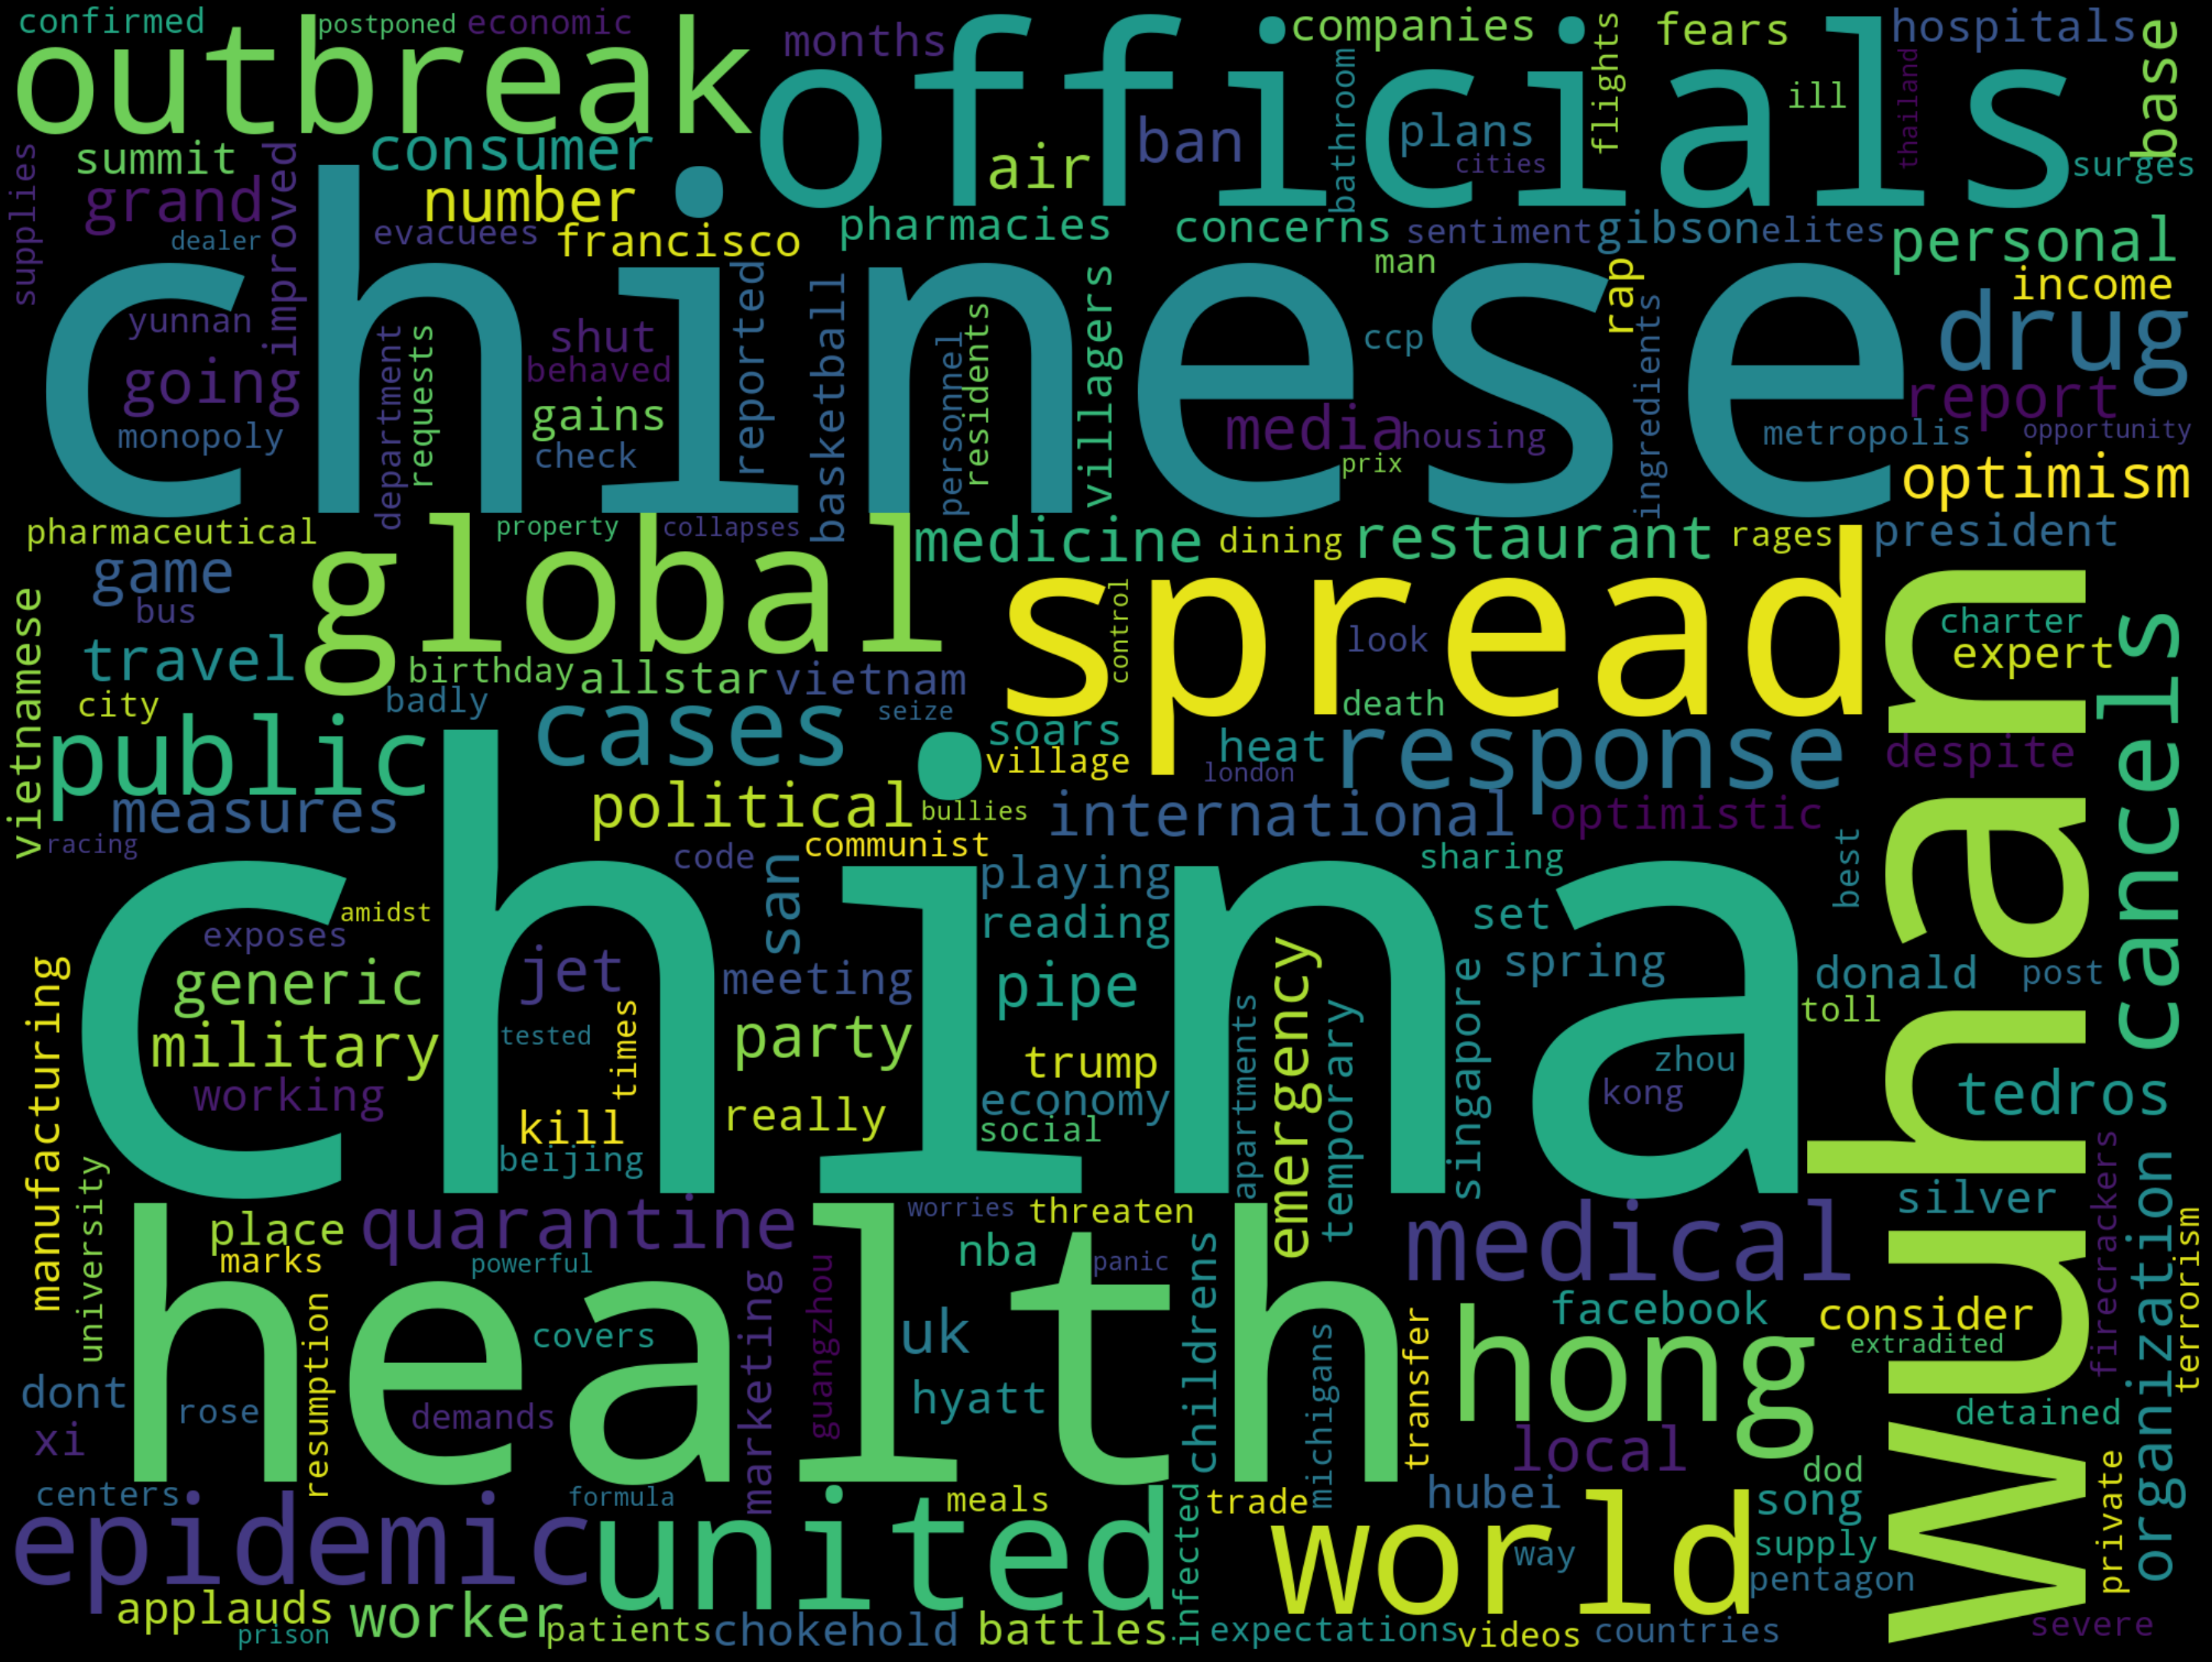

In [732]:
text = " ".join(string)
wordcloud = WordCloud(
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [744]:
data = pd.read_csv("imgsrc.csv") 

In [745]:
data.head()

IMG URL
0                                               None
1                                               None
2  https://res.cloudinary.com/dq49yzr5o/image/upl...
3  https://res.cloudinary.com/dq49yzr5o/image/upl...
4  https://res.cloudinary.com/dq49yzr5o/image/upl...

In [746]:
data.to_json(r'imgsrc.json')

In [747]:
import json
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
db = client['pro3news']
collection= db['keywords']

with open('imgsrc.json') as g:
    file_data = json.load(g)

# if pymongo >= 3.0 use insert_one() for inserting one document
collection.insert_one(file_data)


client.close()

In [754]:
type(word_data)

dict

In [760]:
word_data['keywords']

{'0': '[]',
 '1': '[]',
 '2': "['international', 'chinese', 'patients', 'coronavirus', 'goes', 'deadly', 'hong', 'china', 'virus', 'panic', 'kong', 'spread', 'global', 'times', 'need', 'united', 'arizona', 'fifth', 'coronavirus', 'case', 'cdc', 'health', 'china', 'virus', 'disease', 'confirmed', 'spread', 'resident', 'states', 'wuhan', 'chinese', 'cases', 'city', 'identified', 'social', 'china', 'virus', 'lockdown', 'million', '20', 'authorities', 'officials', 'extends', 'cities', 'media', 'wuhan', 'chinese', 'coronavirus', 'know', 'wuhan', 'business', 'texas', 'serious', 'research', 'really', 'exclusive', 'virus', 'flu', 'vaccine', 'reported', 'physician', 'hotez', 'doctor', 'mexican', 'traveled', 'border', 'case', 'texas', 'health', 'individual', 'amlo', 'reynosa', 'breitbart', 'chinese', 'reaches', 'city', 'coronavirus', 'possible', 'project', 'twitter', 'senior', 'professor', 'chinese', 'urges', 'coronavirus', 'ban', 'consider', 'china', 'virus', 'exclusive', 'disease', 'travel', '

In [807]:
y = json.dumps(word_data['keywords']) 

In [808]:
y

'{"0": "[]", "1": "[]", "2": "[\'international\', \'chinese\', \'patients\', \'coronavirus\', \'goes\', \'deadly\', \'hong\', \'china\', \'virus\', \'panic\', \'kong\', \'spread\', \'global\', \'times\', \'need\', \'united\', \'arizona\', \'fifth\', \'coronavirus\', \'case\', \'cdc\', \'health\', \'china\', \'virus\', \'disease\', \'confirmed\', \'spread\', \'resident\', \'states\', \'wuhan\', \'chinese\', \'cases\', \'city\', \'identified\', \'social\', \'china\', \'virus\', \'lockdown\', \'million\', \'20\', \'authorities\', \'officials\', \'extends\', \'cities\', \'media\', \'wuhan\', \'chinese\', \'coronavirus\', \'know\', \'wuhan\', \'business\', \'texas\', \'serious\', \'research\', \'really\', \'exclusive\', \'virus\', \'flu\', \'vaccine\', \'reported\', \'physician\', \'hotez\', \'doctor\', \'mexican\', \'traveled\', \'border\', \'case\', \'texas\', \'health\', \'individual\', \'amlo\', \'reynosa\', \'breitbart\', \'chinese\', \'reaches\', \'city\', \'coronavirus\', \'possible\

In [809]:
# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print(str2[i], ':', str.count(str2[i]))     
  
def main(): 
    str = y
    freq(str)                     
  
if __name__=="__main__": 
    main()             # call main function 

{"0": : 1
"[]", : 6
"1": : 1
"2": : 1
"['international', : 2
'chinese', : 259
'patients', : 148
'coronavirus', : 1662
'goes', : 6
'deadly', : 27
'hong', : 39
'china', : 603
'virus', : 754
'panic', : 35
'kong', : 33
'spread', : 235
'global', : 317
'times', : 56
'need', : 58
'united', : 123
'arizona', : 5
'fifth', : 2
'case', : 66
'cdc', : 59
'health', : 462
'disease', : 86
'confirmed', : 90
'resident', : 1
'states', : 124
'wuhan', : 352
'cases', : 337
'city', : 103
'identified', : 6
'social', : 46
'lockdown', : 34
'million', : 98
'20', : 11
'authorities', : 41
'officials', : 141
'extends', : 7
'cities', : 19
'media', : 52
'know', : 52
'business', : 36
'texas', : 24
'serious', : 12
'research', : 13
'really', : 21
'exclusive', : 12
'flu', : 54
'vaccine', : 61
'reported', : 133
'physician', : 3
'hotez', : 2
'doctor', : 27
'mexican', : 3
'traveled', : 10
'border', : 10
'individual', : 2
'amlo', : 2
'reynosa', : 1
'breitbart', : 6
'reaches', : 5
'possible', : 23
'project', : 4
'twitter', : 3

'singapore', : 9
'temporary', : 9
'10000', : 3
'worker', : 10
'vietnam', : 9
'vietnamese', : 1
'quarantines', : 9
'villagers', : 1
'consumers', : 6
'1960', : 1
'improved', : 2
'income', : 11
'gains', : 15
'reading', : 3
'soars', : 5
'expectations', : 3
'michigans', : 1
'rose', : 62
'best', : 8
'sentiment', : 4
'personal', : 5
'rages', : 1
'air', : 31
'resumption', : 1
'severe', : 27
'restaurant', : 6
'meals', : 3
'guangzhou', : 1
'metropolis', : 1
'restaurants', : 11
'dining', : 1
'exposes', : 2
'supply', : 35
'monopoly', : 1
'supplies', : 39
'trade', : 39
'pharmaceutical', : 4
'ingredients', : 2
'village', : 2
'threaten', : 5
'firecrackers', : 1
'covers', : 1
'birthday', : 2
'detained', : 2
'ccp', : 1
'yunnan', : 3
'code', : 1
'marks', : 3
'dod', : 3
'personnel', : 2
'evacuees', : 17
'pentagon', : 3
'centers', : 4
'base', : 7
'check', : 16
'bases', : 3
'ill', : 11
'transfer', : 1
'behaved', : 1
'bus', : 1
'badly', : 1
'housing', : 4
'apartments', : 1
'pipes', : 1
'bathroom', : 1
'pipe

'quote', : 1
'ventilators', : 24
'governors', : 7
'deceptively', : 2
'authors', : 1
'edit', : 1
'try', : 19
'16', : 5
'equipment', : 13
'illinois', : 4
'exempted', : 1
'stores', : 39
'essential', : 12
'shutdown', : 15
'governor', : 11
'suppliers', : 4
'lists', : 1
'ammunition', : 2
'safety', : 13
'retailers', : 4
'ships', : 10
'attacks', : 3
'operations', : 7
'emp', : 1
'waters', : 1
'including', : 29
'144', : 1
'viruses', : 20
'children', : 12
'remain', : 8
'website', : 3
'delayed', : 4
'weekly', : 11
'season', : 5
'22000', : 1
'lines', : 6
'week', : 150
'chains', : 4
'keeping', : 3
'truck', : 6
'truckers', : 5
'trucker', : 1
'trucking', : 3
'alive', : 2
'ones', : 3
'hollywood', : 1
'boys', : 2
'vital', : 9
'prove', : 2
'matter', : 3
'rejected', : 3
'true', : 6
'update', : 16
'technically', : 1
'refused', : 2
'seizes', : 1
'carrying', : 4
'source', : 14
'sanitiser', : 1
'macrons', : 1
'130000', : 1
'lorries', : 1
'recent', : 11
'chloroquine', : 7
'et', : 1
'effective', : 6
'days', : 5

'japanese', : 13
'fast', : 3
'prompts', : 9
'kongs', : 3
'lam', : 2
'xbox', : 1
'microsoft', : 2
'holiday', : 9
'delays', : 2
'consoles', : 1
'playstation', : 1
'362', : 1
'30', : 6
'trapped', : 5
'owners', : 8
'pet', : 5
'facing', : 5
'starvation', : 1
'units', : 3
'building', : 6
'prefabricated', : 1
'speed', : 7
'instagrammer', : 1
'ruined', : 1
'instead', : 1
'potok', : 1
'joking', : 1
'forced', : 4
'washing', : 4
'doorknobs', : 1
'reason', : 4
'speak', : 1
'xiaowen', : 1
'palsy', : 1
'cheng', : 1
'cerebral', : 1
'handful', : 1
'adults', : 2
'guesses', : 1
'location', : 2
'abacus', : 1
'maps', : 1
'baidu', : 1
'app', : 2
'giant', : 2
'underequipped', : 1
'exhausted', : 1
'overwhelmed', : 3
'insiders', : 3
'frontline', : 1
'volunteered', : 1
'drugmakers', : 2
'tackle', : 4
'sprinting', : 1
'biotech', : 5
'company']", : 1
"19": : 1
'chickens', : 1
'h5n1', : 1
'bird', : 2
'exposure', : 4
'bank', : 19
'areas', : 6
'central', : 17
'destroying', : 1
'collected', : 2
'caixin', : 2
'role',

'shipment', : 2
'diverting', : 2
'island', : 11
'accidentally', : 1
'considered', : 1
'lab', : 3
'laboratory', : 1
'significant', : 9
'convention', : 1
'influence', : 1
'upcoming', : 1
'delegates', : 1
'gather', : 2
'continue', : 4
'exert', : 1
'unclaimed', : 1
'morgues', : 1
'ocme', : 1
'refrigerated', : 2
'storage', : 1
'hart', : 2
'bodies', : 2
'remote', : 1
'families', : 6
'ultimately', : 4
'nycs', : 1
'discounts', : 1
'responders', : 1
'bp', : 1
'amoco', : 1
'cents', : 5
'gallon', : 1
'gas', : 1
'responder', : 1
'discount', : 1
'accusing', : 1
'fema', : 4
'layoffs', : 5
'whopping', : 1
'notorious', : 1
'significantly', : 2
'smog', : 1
'quality', : 2
'modly', : 4
'acting', : 4
'crozier', : 7
'trashed', : 1
'thomas', : 6
'resign', : 5
'faces', : 7
'masking', : 1
'karl', : 2
'mocks', : 1
'generals', : 3
'thank', : 4
'shortages', : 8
'general', : 13
'inspector', : 3
'reporter']", : 1
"28": : 1
"['viral', : 1
'associated', : 4
'caused', : 6
'cause', : 7
'respiratory']", : 2
"29": : 1
"

'mocking', : 1
'promoting', : 1
'operating', : 2
'mindboggling', : 1
'trumptouted', : 1
'reverses', : 1
'3m', : 4
'management', : 3
'distributors', : 1
'ghosts', : 1
'moskowitz', : 1
'chasing', : 1
'pearl', : 1
'harbor', : 1
'moment', : 2
'belgian', : 2
'judith', : 1
'belgium', : 1
'save']", : 1
"41": : 1
"['mcconnell', : 1
'bid', : 3
'approve', : 2
'swiftly', : 1
'250b', : 1
'classifying', : 1
'birx', : 1
'baden', : 1
'stockpiled', : 1
'2006', : 1
'auction', : 1
'cars', : 4
'risen', : 5
'easter', : 4
'pastor', : 1
'share', : 11
'aerosol', : 1
'supermarket', : 2
'chilling', : 1
'ppe', : 8
'resignation', : 4
'directors', : 2
'accomplice', : 1
'tornadoes', : 1
'monroe', : 1
'tornado', : 1
'multiple', : 1
'nominee', : 1
'presumptive', : 2
'movement', : 4
'rendering', : 1
'regulation', : 2
'targets', : 1
'doj', : 1
'drivein', : 1
'furlough', : 1
'lays', : 1
'nyt', : 1
'models', : 1
'narrative', : 2
'berenson', : 1
'challenging', : 1
'galonski', : 1
'prosecuted', : 1
'crimes', : 1
'humanity

'suggestions', : 2
'profiting', : 1
'wroteheres', : 1
'kitchenbathroom', : 1
'sarscov1', : 1
'settings', : 1
'airborne', : 1
'st', : 7
'louis', : 2
'bullard', : 2
'stalled', : 3
'overshadowed', : 1
'hiring', : 2
'hardware', : 2
'delivery', : 6
'openings', : 2
'losing', : 3
'smallbusiness', : 2
'familyleave', : 1
'selfemployed', : 1
'credit', : 4
'employers', : 2
'veterinary', : 2
'virusfree', : 1
'landbased', : 1
'carnival', : 2
'saw', : 3
'pleads', : 3
'explains', : 1
'loan', : 4
'arent', : 4
'ackman', : 1
'billionaire', : 1
'sneezethen', : 1
'sight', : 1
'roll', : 2
'jerks', : 1
'pong', : 1
'term']", : 1
"67": : 1
"['deal', : 1
'40000', : 1
'30000', : 2
'signature', : 1
'signed', : 5
'ignore', : 1
'houses', : 2
'pile', : 2
'tough', : 2
'quick', : 3
'grandparents', : 1
'lt', : 1
'patrick', : 2
'grandkids', : 1
'returns', : 4
'retirees', : 1
'beach', : 2
'counties', : 1
'johns', : 1
'crowded', : 1
'enforcement', : 1
'industries', : 2
'laws', : 1
'environmental', : 2
'epa', : 2
'stopped

'corrects', : 1
'liberty', : 1
'selfisolate', : 1
'yelled', : 1
'mitch', : 1
'13', : 4
'fine', : 4
'apocalyptic', : 1
'motors', : 2
'thoughts', : 1
'ventec', : 1
'anointed', : 1
'hostility', : 3
'crippling', : 1
'handkerchiefs', : 1
'garbage', : 1
'lee', : 1
'coworkers', : 1
'bonanza', : 1
'investments', : 1
'tucked', : 1
'profits', : 3
'freedman', : 1
'helpful', : 1
'philadelphia', : 1
'lease', : 1
'violations', : 1
'relaxation', : 1
'polluters', : 1
'relaxes', : 1
'drastically', : 1
'mission', : 2
'fleet', : 1
'cruel', : 1
'costly', : 1
'motive', : 1
'typically', : 3
'yorker', : 1
'principal', : 1
'romains', : 1
'brooklyn', : 2
'36', : 2
'objections', : 1
'wills', : 1
'secondbiggest', : 1
'outrage', : 1
'having', : 3
'expresses', : 2
'flattened', : 1
'halved']", : 1
"82": : 1
"['rent', : 1
'tenants', : 2
'gentile', : 1
'landlord', : 1
'salerno', : 1
'sherman', : 1
'daytona', : 1
'mar', : 1
'debates', : 2
'obvious', : 2
'dairy', : 3
'farmworkers', : 1
'fabian', : 1
'idaho', : 2
'packi

'greg', : 1
'gdp', : 2
'pt', : 1
'jericho', : 1
'fastmoving', : 1
'eerily', : 1
'timed', : 1
'netflixs', : 1
'alarmed', : 1
'casino', : 1
'melco', : 1
'abandons']", : 1
"103": : 1
"['taking', : 1
'chalice', : 1
'synod', : 1
'surplus', : 2
'cancellations', : 1
'completely', : 1
'bookings', : 1
'koala', : 1
'bushfires', : 1
'buttigieg', : 1
'drone', : 1
'stone', : 1
'exiles', : 1
'roger', : 1
'disappointment', : 1
'transparent', : 1
'unwellunited', : 1
'access', : 3
'brigid', : 1
'era', : 1
'lonely', : 1
'rain', : 1
'delaney', : 1
'yee', : 1
'bagan', : 1
'pagodas', : 1
'burmese', : 1
'buddhist', : 1
'pornographic', : 1
'tun', : 1
'shot', : 3
'pop', : 1
'orchestras', : 1
'postpones', : 1
'stormzy', : 1
'dates', : 1
'symphony', : 1
'trolley', : 1
'ae', : 2
'winter', : 1
'waits', : 1
'les', : 1
'musical', : 1
'mis', : 1
'kretzmer', : 1
'theatre', : 2
'chorus', : 2
'anthem', : 1
'blazes', : 1
'hear', : 1
'taxi', : 1
'summer', : 3
'whitty', : 1
'ghosn', : 1
'14bn', : 1
'bribery', : 1
'venom',

'wsj', : 1
"118": : 1
'annihilated', : 1
'skyrocketed', : 1
'virusalert', : 1
'takeout', : 1
'silence', : 1
'unfolding', : 1
'grapples', : 1
'woke', : 1
'striving', : 1
'stretch', : 1
'selfquarantining', : 1
'selfquarantined', : 1
'transforming', : 1
'facade', : 1
'63', : 1
'salestax', : 1
'tokyofollowing', : 1
'shipprompting', : 1
'unscathed', : 1
'transformed', : 1
'tentacles', : 1
'shudders', : 1
'tethered', : 1
'thwart', : 1
'banished', : 1
'meads', : 1
'headline', : 1
'supermarkets', : 3
'thousand', : 1
'centered', : 1
'projected', : 2
'toiletries', : 1
'draws', : 2
'tokyoafter', : 1
'tenn', : 1
'virusstricken', : 3
'touched', : 1
'sail', : 1
'voyage', : 2
'nike', : 1
'software', : 2
'disrupted', : 1
'titans', : 1
'apps', : 1
'healthrating', : 1
'transmissible', : 1
'succeeded', : 2
'gileads', : 1
'wound', : 1
'undercounting', : 1
'unpublished', : 1
'tallythe', : 1
'spark', : 1
'clusters', : 1
'prospects', : 1
'washingtonfederal', : 1
'signaled', : 1
'released']", : 1
"119": : 1
"

In [793]:
newspapers = ['Breitbart']
times = ['1_1','1_2','1_3','1_4','2_1','2_2','2_3','2_4','3_1','3_2','3_3','3_4','4_1','4_2']
df = pd.DataFrame(columns = ["newspaper","time","keywords"])

for paper in newspapers: 
    for time in times:
        print(paper,time)
        with open(paper+'/'+time+'.json') as json_file:
            total_data = json.load(json_file)
            
            ##Make an empty list for every article, derive the keywords and append to list
            l=[]
            for data in total_data['articles']['results']:
                art = Article(url=data['url'])
                try:
                    art = Article(url=data['url'])
                    art.download()
                    art.parse()
                    art.nlp()
                    l.append(art.keywords)
                    
                except:
                    continue
                    
           #updated empty list creates flat keywords without '' 
            list1=[]
            list1 = [item for sublist in l for item in sublist]
            
            #Append data to dataframe    
            df = df.append({'newspaper': paper, 'time': time, 'keywords': list1}, ignore_index=True)

Breitbart 1_1
Breitbart 1_2
Breitbart 1_3
Breitbart 1_4
Breitbart 2_1
Breitbart 2_2
Breitbart 2_3
Breitbart 2_4
Breitbart 3_1
Breitbart 3_2
Breitbart 3_3
Breitbart 3_4
Breitbart 4_1
Breitbart 4_2


In [812]:
df.to_json(r'bb_data.json')

In [813]:
with open('bb_data.json') as json_file:
            bb_data = json.load(json_file)

In [814]:
b = json.dumps(bb_data['keywords']) 

In [815]:
b

'{"0": [], "1": [], "2": ["kong", "china", "chinese", "coronavirus", "times", "hong", "goes", "need", "panic", "spread", "patients", "virus", "global", "international", "deadly", "cdc", "disease", "states", "china", "health", "coronavirus", "united", "confirmed", "spread", "fifth", "arizona", "virus", "wuhan", "case", "resident", "cases", "identified", "social", "officials", "china", "chinese", "million", "media", "20", "extends", "cities", "wuhan", "authorities", "city", "lockdown", "virus", "flu", "reported", "business", "doctor", "physician", "chinese", "know", "coronavirus", "vaccine", "really", "exclusive", "serious", "wuhan", "texas", "research", "virus", "hotez", "border", "individual", "possible", "coronavirus", "mexican", "reaches", "twitter", "amlo", "project", "chinese", "traveled", "health", "texas", "case", "city", "reynosa", "senior", "breitbart", "professor", "urges", "disease", "cotton", "states", "china", "ban", "chinese", "coronavirus", "united", "consider", "spread",

In [816]:
# Python code to find frequency of each word 
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print(str2[i], ':', str.count(str2[i]))     
  
def main(): 
    str = b
    freq(str)                     
  
if __name__=="__main__": 
    main()             # call main function 

{"0": : 1
[], : 2
"1": : 1
"2": : 1
["kong", : 1
"china", : 105
"chinese", : 83
"coronavirus", : 217
"times", : 12
"hong", : 9
"goes", : 1
"need", : 8
"panic", : 7
"spread", : 32
"patients", : 17
"virus", : 87
"global", : 12
"international", : 8
"deadly", : 4
"cdc", : 10
"disease", : 9
"states", : 12
"health", : 58
"united", : 23
"confirmed", : 16
"fifth", : 1
"arizona", : 1
"wuhan", : 62
"case", : 8
"resident", : 1
"cases", : 34
"identified", : 3
"social", : 4
"officials", : 23
"million", : 15
"media", : 25
"20", : 3
"extends", : 1
"cities", : 5
"authorities", : 4
"city", : 14
"lockdown", : 6
"flu", : 6
"reported", : 14
"business", : 7
"doctor", : 5
"physician", : 1
"know", : 4
"vaccine", : 5
"really", : 6
"exclusive", : 3
"serious", : 4
"texas", : 7
"research", : 1
"hotez", : 1
"border", : 5
"individual", : 1
"possible", : 6
"mexican", : 1
"reaches", : 1
"twitter", : 8
"amlo", : 1
"project", : 2
"traveled", : 3
"reynosa", : 1
"senior", : 1
"breitbart", : 6
"professor", : 1
"urges", :

"hyatt", : 1
"dont", : 3
"rap", : 1
"battles", : 1
"childrens", : 1
"grand", : 2
"singapore", : 1
"song", : 2
"quarantines", : 1
"vietnamese", : 1
"10000", : 1
"temporary", : 1
"vietnam", : 1
"villagers", : 1
"worker", : 1
"soars", : 1
"income", : 1
"sentiment", : 1
"reading", : 1
"consumers", : 2
"1960", : 1
"best", : 2
"rose", : 2
"michigans", : 1
"improved", : 1
"personal", : 2
"expectations", : 1
"gains", : 2
"air", : 2
"rages", : 1
"resumption", : 1
"restaurant", : 2
"meals", : 1
"metropolis", : 1
"restaurants", : 1
"severe", : 2
"dining", : 1
"guangzhou", : 1
"supplies", : 3
"exposes", : 1
"trade", : 3
"monopoly", : 1
"ingredients", : 1
"supply", : 5
"pharmaceutical", : 2
"firecrackers", : 1
"threaten", : 1
"birthday", : 1
"village", : 1
"covers", : 1
"yunnan", : 1
"detained", : 1
"ccp", : 1
"code", : 1
"centers", : 1
"personnel", : 1
"pentagon", : 1
"bases", : 1
"marks", : 1
"check", : 9
"dod", : 1
"evacuees", : 1
"base", : 1
"behaved", : 1
"ill", : 2
"transfer", : 1
"badly", : 

"group", : 2
"blocking", : 1
"ortiz", : 1
"employees", : 1
"statement", : 1
"cares", : 2
"network", : 1
"provide", : 1
"cassidy", : 1
"block", : 1
"warned", : 1
"mardi", : 1
"red", : 1
"moved", : 1
"flags", : 1
"given", : 1
"gras", : 1
"noncitizens", : 1
"extend", : 1
"tax", : 1
"aoc", : 1
"checks", : 3
"upset", : 1
"center", : 3
"immigrants", : 4
"died", : 1
"ventilator", : 2
"berardelli", : 1
"respirator", : 1
"father", : 1
"wife", : 1
"suffered", : 1
"priest", : 1
"leaves", : 1
"mr", : 1
"p", : 1
"old", : 1
"added", : 1
"101yearold", : 1
"rimini", : 1
"hangs", : 1
"celebrating", : 1
"banner", : 1
"robert", : 1
"accountable", : 1
"davi", : 1
"marxists", : 1
"27", : 1
"bridge", : 1
"breaks", : 1
"jiangxi", : 1
"massive", : 1
"riot", : 1
"supplier", : 1
"suddenly", : 1
"finds", : 1
"39", : 1
"seiu", : 1
"credits", : 1
"proof", : 1
"whitmer", : 2
"mi", : 1
"gruber", : 1
"sentencing", : 1
"santilli", : 1
"combination", : 1
"surviving", : 1
"agencies", : 1
"agency", : 1
"unions", : 1
"max

In [820]:
newspapers = ['Fox News']
times = ['1_1','1_2','1_3','1_4','2_1','2_2','2_3','2_4','3_1','3_2','3_3','3_4','4_1','4_2']
bidf = pd.DataFrame(columns = ["newspaper","time","keywords"])

for paper in newspapers: 
    for time in times:
        print(paper,time)
        with open(paper+'/'+time+'.json') as json_file:
            total_data = json.load(json_file)
            
            ##Make an empty list for every article, derive the keywords and append to list
            l=[]
            for data in total_data['articles']['results']:
                art = Article(url=data['url'])
                try:
                    art = Article(url=data['url'])
                    art.download()
                    art.parse()
                    art.nlp()
                    l.append(art.keywords)
                    
                except:
                    continue
                    
           #updated empty list creates flat keywords without '' 
            list1=[]
            list1 = [item for sublist in l for item in sublist]
            
            #Append data to dataframe    
            bidf = df.append({'newspaper': paper, 'time': time, 'keywords': list1}, ignore_index=True)

Fox News 1_1
Fox News 1_2
Fox News 1_3
Fox News 1_4
Fox News 2_1
Fox News 2_2
Fox News 2_3
Fox News 2_4
Fox News 3_1
Fox News 3_2
Fox News 3_3
Fox News 3_4
Fox News 4_1
Fox News 4_2


In [827]:
bidf.to_json(r'fox_data.json')

In [828]:
with open('fox_data.json') as json_file:
            fox_data = json.load(json_file)

In [829]:
c = json.dumps(fox_data['keywords']) 

In [830]:
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print(str2[i], ':', str.count(str2[i]))     
  
def main(): 
    str = c
    freq(str)                     
  
if __name__=="__main__": 
    main()             # call main function 

{"0": : 1
[], : 2
"1": : 1
"2": : 1
["kong", : 1
"china", : 110
"chinese", : 85
"coronavirus", : 236
"times", : 12
"hong", : 9
"goes", : 1
"need", : 8
"panic", : 7
"spread", : 33
"patients", : 18
"virus", : 92
"global", : 12
"international", : 9
"deadly", : 4
"cdc", : 10
"disease", : 9
"states", : 17
"health", : 62
"united", : 27
"confirmed", : 17
"fifth", : 1
"arizona", : 1
"wuhan", : 62
"case", : 8
"resident", : 1
"cases", : 34
"identified", : 3
"social", : 6
"officials", : 24
"million", : 19
"media", : 25
"20", : 3
"extends", : 1
"cities", : 5
"authorities", : 4
"city", : 16
"lockdown", : 7
"flu", : 6
"reported", : 15
"business", : 8
"doctor", : 5
"physician", : 1
"know", : 4
"vaccine", : 5
"really", : 6
"exclusive", : 3
"serious", : 4
"texas", : 7
"research", : 1
"hotez", : 1
"border", : 5
"individual", : 1
"possible", : 6
"mexican", : 1
"reaches", : 1
"twitter", : 8
"amlo", : 1
"project", : 2
"traveled", : 3
"reynosa", : 1
"senior", : 1
"breitbart", : 6
"professor", : 1
"urges", :

"hysteria", : 1
"driven", : 1
"antitrump", : 1
"proportion", : 1
"partly", : 1
"getting", : 3
"better", : 1
"al", : 1
"lot", : 4
"sharpton", : 1
"compassion", : 1
"michael", : 1
"baldwin", : 1
"dangerous", : 2
"theres", : 2
"suggests", : 2
"moore", : 1
"merrill", : 1
"offer", : 1
"drugs", : 3
"departments", : 1
"psa", : 1
"meth", : 1
"issued", : 2
"supremacist", : 1
"white", : 11
"blames", : 1
"racism", : 1
"epidemic"], : 1
"8": : 1
["remove", : 1
"work", : 6
"germs", : 1
"hands", : 2
"wash", : 2
"handwashing", : 1
"water", : 2
"hand", : 1
"doesnt", : 1
"seconds", : 1
"sanitizer", : 2
"soap", : 1
"shapps", : 1
"rules", : 1
"slots", : 1
"flying", : 1
"transport", : 1
"suspended", : 1
"operators", : 1
"gallons", : 1
"fuel", : 1
"ghost", : 1
"planes", : 1
"illness", : 1
"sick", : 3
"joes", : 1
"memo", : 1
"stay", : 3
"strategy", : 1
"paid", : 2
"giving", : 2
"crew", : 1
"ensure", : 1
"trader", : 1
"34", : 1
"far", : 2
"lower", : 2
"citing", : 1
"hunch", : 1
"presidential", : 3
"support", 

"formally", : 1
"committee", : 1
"probe", : 1
"witch", : 1
"harris", : 1
"feinstein", : 1
"federal"]} : 1


In [826]:
newspapers = ['NYTimes']
times = ['1_1','1_2','1_3','1_4','2_1','2_2','2_3','2_4','3_1','3_2','3_3','3_4','4_1','4_2']
nydf = pd.DataFrame(columns = ["newspaper","time","keywords"])

for paper in newspapers: 
    for time in times:
        print(paper,time)
        with open(paper+'/'+time+'.json') as json_file:
            total_data = json.load(json_file)
            
            ##Make an empty list for every article, derive the keywords and append to list
            l=[]
            for data in total_data['articles']['results']:
                art = Article(url=data['url'])
                try:
                    art = Article(url=data['url'])
                    art.download()
                    art.parse()
                    art.nlp()
                    l.append(art.keywords)
                    
                except:
                    continue
                    
           #updated empty list creates flat keywords without '' 
            list1=[]
            list1 = [item for sublist in l for item in sublist]
            
            #Append data to dataframe    
            nydf = df.append({'newspaper': paper, 'time': time, 'keywords': list1}, ignore_index=True)

NYTimes 1_1
NYTimes 1_2
NYTimes 1_3
NYTimes 1_4
NYTimes 2_1
NYTimes 2_2
NYTimes 2_3
NYTimes 2_4
NYTimes 3_1
NYTimes 3_2
NYTimes 3_3
NYTimes 3_4
NYTimes 4_1
NYTimes 4_2


In [831]:
nydf.to_json(r'nyt_data.json')

In [832]:
with open('nyt_data.json') as json_file:
            nyt_data = json.load(json_file)

In [833]:
d = json.dumps(nyt_data['keywords']) 

In [834]:
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print(str2[i], ':', str.count(str2[i]))     
  
def main(): 
    str = d
    freq(str)                     
  
if __name__=="__main__": 
    main()             # call main function 

{"0": : 1
[], : 2
"1": : 1
"2": : 1
["kong", : 1
"china", : 105
"chinese", : 83
"coronavirus", : 225
"times", : 16
"hong", : 9
"goes", : 1
"need", : 9
"panic", : 7
"spread", : 34
"patients", : 17
"virus", : 92
"global", : 12
"international", : 8
"deadly", : 5
"cdc", : 10
"disease", : 9
"states", : 12
"health", : 58
"united", : 23
"confirmed", : 16
"fifth", : 1
"arizona", : 1
"wuhan", : 62
"case", : 8
"resident", : 1
"cases", : 36
"identified", : 3
"social", : 4
"officials", : 23
"million", : 16
"media", : 25
"20", : 3
"extends", : 1
"cities", : 5
"authorities", : 4
"city", : 15
"lockdown", : 6
"flu", : 6
"reported", : 14
"business", : 7
"doctor", : 5
"physician", : 1
"know", : 8
"vaccine", : 5
"really", : 6
"exclusive", : 3
"serious", : 5
"texas", : 7
"research", : 1
"hotez", : 1
"border", : 5
"individual", : 1
"possible", : 6
"mexican", : 1
"reaches", : 1
"twitter", : 8
"amlo", : 1
"project", : 2
"traveled", : 3
"reynosa", : 1
"senior", : 1
"breitbart", : 6
"professor", : 2
"urges", :

"meals", : 1
"metropolis", : 1
"restaurants", : 1
"severe", : 2
"dining", : 1
"guangzhou", : 1
"supplies", : 3
"exposes", : 1
"trade", : 4
"monopoly", : 1
"ingredients", : 1
"supply", : 5
"pharmaceutical", : 2
"firecrackers", : 1
"threaten", : 1
"birthday", : 1
"village", : 1
"covers", : 1
"yunnan", : 1
"detained", : 1
"ccp", : 1
"code", : 1
"centers", : 1
"personnel", : 1
"pentagon", : 1
"bases", : 1
"marks", : 1
"check", : 9
"dod", : 1
"evacuees", : 1
"base", : 1
"behaved", : 1
"ill", : 2
"transfer", : 1
"badly", : 1
"bus", : 1
"apartments", : 1
"bathroom", : 1
"pipe", : 1
"housing", : 1
"pipes", : 1
"way", : 5
"look", : 1
"charter", : 1
"requests", : 1
"toll", : 4
"elites", : 1
"jets", : 1
"private", : 2
"jet", : 1
"surges", : 1
"powerful", : 2
"terrorism", : 1
"opportunity", : 1
"property", : 1
"emergency", : 8
"seize", : 1
"collapses", : 1
"dealer", : 1
"extradited", : 1
"thailand", : 1
"prison", : 1
"london", : 4
"postponed", : 1
"racing", : 1
"formula", : 1
"amidst", : 1
"worrie

"leaves", : 1
"mr", : 4
"p", : 1
"old", : 1
"added", : 1
"101yearold", : 1
"rimini", : 1
"hangs", : 1
"celebrating", : 1
"banner", : 1
"robert", : 1
"accountable", : 1
"davi", : 1
"marxists", : 1
"27", : 1
"bridge", : 1
"breaks", : 1
"jiangxi", : 1
"massive", : 1
"riot", : 1
"supplier", : 1
"suddenly", : 1
"finds", : 1
"39", : 1
"seiu", : 1
"credits", : 1
"proof", : 1
"whitmer", : 2
"mi", : 1
"gruber", : 1
"sentencing", : 1
"santilli", : 1
"combination", : 1
"surviving", : 1
"agencies", : 1
"agency", : 1
"unions", : 1
"maximize", : 1
"minority", : 1
"list", : 2
"banks", : 1
"approval", : 2
"favor", : 1
"rating", : 2
"gallup", : 1
"poll", : 2
"49", : 1
"handling"], : 1
"12": : 1
["department", : 1
"sex", : 1
"jailbreak", : 2
"inmates", : 2
"offenders", : 1
"convicted", : 2
"freed", : 1
"release", : 2
"cuomos", : 1
"voting", : 7
"society", : 3
"pushing", : 1
"scheme", : 1
"mailin", : 5
"soros", : 2
"sorosfunded", : 2
"george", : 1
"introduce", : 1
"measure", : 1
"taxpayers", : 1
"1200", 

In [835]:
newspapers = ['Reuters']
times = ['1_1','1_2','1_3','1_4','2_1','2_2','2_3','2_4','3_1','3_2','3_3','3_4','4_1','4_2']
redf = pd.DataFrame(columns = ["newspaper","time","keywords"])

for paper in newspapers: 
    for time in times:
        print(paper,time)
        with open(paper+'/'+time+'.json') as json_file:
            total_data = json.load(json_file)
            
            ##Make an empty list for every article, derive the keywords and append to list
            l=[]
            for data in total_data['articles']['results']:
                art = Article(url=data['url'])
                try:
                    art = Article(url=data['url'])
                    art.download()
                    art.parse()
                    art.nlp()
                    l.append(art.keywords)
                    
                except:
                    continue
                    
           #updated empty list creates flat keywords without '' 
            list1=[]
            list1 = [item for sublist in l for item in sublist]
            
            #Append data to dataframe    
            redf = df.append({'newspaper': paper, 'time': time, 'keywords': list1}, ignore_index=True)

Reuters 1_1
Reuters 1_2
Reuters 1_3
Reuters 1_4
Reuters 2_1
Reuters 2_2
Reuters 2_3
Reuters 2_4
Reuters 3_1
Reuters 3_2
Reuters 3_3
Reuters 3_4
Reuters 4_1
Reuters 4_2


In [836]:
redf.to_json(r're_data.json')

In [837]:
with open('re_data.json') as json_file:
            re_data = json.load(json_file)

In [838]:
e = json.dumps(nyt_data['keywords']) 

In [839]:
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        print(str2[i], ':', str.count(str2[i]))     
  
def main(): 
    str = e
    freq(str)                     
  
if __name__=="__main__": 
    main()             # call main function 

{"0": : 1
[], : 2
"1": : 1
"2": : 1
["kong", : 1
"china", : 105
"chinese", : 83
"coronavirus", : 225
"times", : 16
"hong", : 9
"goes", : 1
"need", : 9
"panic", : 7
"spread", : 34
"patients", : 17
"virus", : 92
"global", : 12
"international", : 8
"deadly", : 5
"cdc", : 10
"disease", : 9
"states", : 12
"health", : 58
"united", : 23
"confirmed", : 16
"fifth", : 1
"arizona", : 1
"wuhan", : 62
"case", : 8
"resident", : 1
"cases", : 36
"identified", : 3
"social", : 4
"officials", : 23
"million", : 16
"media", : 25
"20", : 3
"extends", : 1
"cities", : 5
"authorities", : 4
"city", : 15
"lockdown", : 6
"flu", : 6
"reported", : 14
"business", : 7
"doctor", : 5
"physician", : 1
"know", : 8
"vaccine", : 5
"really", : 6
"exclusive", : 3
"serious", : 5
"texas", : 7
"research", : 1
"hotez", : 1
"border", : 5
"individual", : 1
"possible", : 6
"mexican", : 1
"reaches", : 1
"twitter", : 8
"amlo", : 1
"project", : 2
"traveled", : 3
"reynosa", : 1
"senior", : 1
"breitbart", : 6
"professor", : 2
"urges", :

"10000", : 1
"temporary", : 1
"vietnam", : 1
"villagers", : 1
"worker", : 1
"soars", : 1
"income", : 1
"sentiment", : 1
"reading", : 1
"consumers", : 2
"1960", : 1
"best", : 2
"rose", : 2
"michigans", : 1
"improved", : 1
"personal", : 2
"expectations", : 1
"gains", : 2
"air", : 2
"rages", : 1
"resumption", : 1
"restaurant", : 2
"meals", : 1
"metropolis", : 1
"restaurants", : 1
"severe", : 2
"dining", : 1
"guangzhou", : 1
"supplies", : 3
"exposes", : 1
"trade", : 4
"monopoly", : 1
"ingredients", : 1
"supply", : 5
"pharmaceutical", : 2
"firecrackers", : 1
"threaten", : 1
"birthday", : 1
"village", : 1
"covers", : 1
"yunnan", : 1
"detained", : 1
"ccp", : 1
"code", : 1
"centers", : 1
"personnel", : 1
"pentagon", : 1
"bases", : 1
"marks", : 1
"check", : 9
"dod", : 1
"evacuees", : 1
"base", : 1
"behaved", : 1
"ill", : 2
"transfer", : 1
"badly", : 1
"bus", : 1
"apartments", : 1
"bathroom", : 1
"pipe", : 1
"housing", : 1
"pipes", : 1
"way", : 5
"look", : 1
"charter", : 1
"requests", : 1
"toll"

"fall", : 1
"clintons", : 1
"fda", : 2
"rapid", : 1
"minutes", : 1
"approved", : 1
"45", : 1
"systems"], : 1
"11": : 1
["foreign", : 1
"illegal", : 4
"amnesty", : 1
"aliens", : 4
"slips", : 1
"jobs", : 1
"latest", : 1
"daca", : 1
"limit", : 1
"person", : 2
"imposes", : 1
"ballot", : 4
"2018", : 1
"harvesting", : 1
"designated", : 1
"practice", : 1
"ballots", : 5
"nationwide", : 3
"making", : 1
"mask", : 3
"professionals", : 1
"n95", : 3
"mypillow", : 1
"criminal", : 1
"1000000000", : 1
"sanctuary", : 1
"grant", : 1
"jurisdictions", : 1
"federal", : 6
"swingstate", : 1
"guns", : 1
"supporting", : 1
"makers", : 1
"benson", : 1
"whip", : 1
"push", : 2
"wind", : 2
"agenda", : 1
"james", : 1
"leftist", : 1
"guy", : 1
"weekend", : 1
"majority", : 1
"clyburn", : 1
"dsc", : 1
"phone", : 1
"21", : 1
"disappear", : 1
"cellphone", : 1
"cell", : 1
"users", : 1
"phones", : 1
"parenthood", : 1
"strassel", : 1
"pork", : 1
"crisis", : 5
"small", : 2
"futures", : 1
"prevent", : 1
"votes", : 1
"rushing"

In [840]:
newspapers = ['The Guardian']
times = ['1_1','1_2','1_3','1_4','2_1','2_2','2_3','2_4','3_1','3_2','3_3','3_4','4_1','4_2']
gdf = pd.DataFrame(columns = ["newspaper","time","keywords"])

for paper in newspapers: 
    for time in times:
        print(paper,time)
        with open(paper+'/'+time+'.json') as json_file:
            total_data = json.load(json_file)
            
            ##Make an empty list for every article, derive the keywords and append to list
            l=[]
            for data in total_data['articles']['results']:
                art = Article(url=data['url'])
                try:
                    art = Article(url=data['url'])
                    art.download()
                    art.parse()
                    art.nlp()
                    l.append(art.keywords)
                    
                except:
                    continue
                    
           #updated empty list creates flat keywords without '' 
            list1=[]
            list1 = [item for sublist in l for item in sublist]
            
            #Append data to dataframe    
            gdf = df.append({'newspaper': paper, 'time': time, 'keywords': list1}, ignore_index=True)

The Guardian 1_1
The Guardian 1_2
The Guardian 1_3
The Guardian 1_4
The Guardian 2_1
The Guardian 2_2
The Guardian 2_3
The Guardian 2_4
The Guardian 3_1
The Guardian 3_2
The Guardian 3_3
The Guardian 3_4
The Guardian 4_1
The Guardian 4_2


In [843]:
gdf.to_json(r'gd_data.json')

In [844]:
with open('gd_data.json') as json_file:
            gd_data = json.load(json_file)

In [845]:
f = json.dumps(gd_data['keywords']) 

In [899]:
def freq(string): 
    l1 =[]
    # break the string into list of words  
    str1 = string.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str1:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
  
        # count the frequency of each word(present  
        # in str2) in str and print 
        l1.append([str2[i], str1.count(str2[i])])     
    return l1 
def main(): 
    str = f
    freq(str)                     
    
if __name__=="__main__":
    main()
                # call main function 

In [929]:
str1 = f.split()          
str2 = [] 
str1 = str1[5:]
str_new=[x[1:-2] for x in str1]

In [930]:
str_new

['"kong',
 'china',
 'chinese',
 'coronavirus',
 'times',
 'hong',
 'goes',
 'need',
 'panic',
 'spread',
 'patients',
 'virus',
 'global',
 'international',
 'deadly',
 'cdc',
 'disease',
 'states',
 'china',
 'health',
 'coronavirus',
 'united',
 'confirmed',
 'spread',
 'fifth',
 'arizona',
 'virus',
 'wuhan',
 'case',
 'resident',
 'cases',
 'identified',
 'social',
 'officials',
 'china',
 'chinese',
 'million',
 'media',
 '20',
 'extends',
 'cities',
 'wuhan',
 'authorities',
 'city',
 'lockdown',
 'virus',
 'flu',
 'reported',
 'business',
 'doctor',
 'physician',
 'chinese',
 'know',
 'coronavirus',
 'vaccine',
 'really',
 'exclusive',
 'serious',
 'wuhan',
 'texas',
 'research',
 'virus',
 'hotez',
 'border',
 'individual',
 'possible',
 'coronavirus',
 'mexican',
 'reaches',
 'twitter',
 'amlo',
 'project',
 'chinese',
 'traveled',
 'health',
 'texas',
 'case',
 'city',
 'reynosa',
 'senior',
 'breitbart',
 'professor',
 'urges',
 'disease',
 'cotton',
 'states',
 'china',
 '